In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
# !pip install scipy
# !pip install statsmodels
# !pip install pingouin

In [2]:
from scipy import stats 
import statsmodels as sm
import pingouin as pg

# Estadistica para Ciencia de Datos

# 1. Estadistica Descriptiva 

## Conceptos b√°sicos

## Introducci√≥n

La estad√≠stica cl√°sica se enfoc√≥ casi exclusivamente en la inferencia, un conjunto a veces complejo de procedimientos para sacar conclusiones sobre grandes poblaciones basadas en muestras peque√±as. En 1962, John W. Tukey llam√≥ a una reforma de la estad√≠stica en su art√≠culo seminal "The Future of Data Analysis" [Tukey-1962]. Propuso una nueva disciplina cient√≠fica llamada an√°lisis de datos que inclu√≠a la inferencia estad√≠stica como un componente m√°s. Tukey present√≥ gr√°ficos simples (por ejemplo, diagramas de caja, diagramas de dispersi√≥n) que, junto con estad√≠sticas resumen (media, mediana, cuantiles, etc.), ayudan a pintar un cuadro de un conjunto de datos.

## Tipos B√°sicos de Datos Estructurados  

Hay dos tipos b√°sicos de datos estructurados: `num√©ricos` y `categ√≥ricos`.  
Los datos num√©ricos vienen en dos formas: `continuos`, como la velocidad del viento o la duraci√≥n del tiempo, y `discretos`, como el conteo de la ocurrencia de un evento.  
Los datos categ√≥ricos solo toman un conjunto fijo de valores, como el tipo de pantalla de TV (plasma, LCD, LED, etc.) o el nombre de un estado (Alabama, Alaska, etc.).  
Los datos binarios son un caso especial de datos categ√≥ricos que toman solo uno de dos valores, como 0/1, s√≠/no, o verdadero/falso.  
Otro tipo √∫til de datos categ√≥ricos son los datos ordinales en los que las categor√≠as est√°n ordenadas; un ejemplo de esto es una calificaci√≥n num√©rica (1, 2, 3, 4 o 5), los grados en la ESO pueden clasificarse como ordinales.


## T√©rminos Clave para Tipos de Datos

- **Numeric (Num√©rico)**: Datos que se expresan en una escala num√©rica.

- **Continuous (Continuos)**: Datos que pueden tomar cualquier valor en un intervalo. (Sin√≥nimos: intervalo, flotante, num√©rico)

- **Discrete (Discretos)**: Datos que solo pueden tomar valores enteros, como conteos. (Sin√≥nimos: entero, conteo)

- **Categorical (Categ√≥ricos)**: Datos que solo pueden tomar un conjunto espec√≠fico de valores que representan un conjunto de posibles categor√≠as. (Sin√≥nimos: enums, enumerados, factores, nominales)

- **Binary (Binarios)**: Un caso especial de datos categ√≥ricos con solo dos categor√≠as de valores, por ejemplo, 0/1, verdadero/falso. (Sin√≥nimos: dicot√≥micos, l√≥gicos, indicadores, booleanos)

- **Ordinal (Ordinales)**: Datos categ√≥ricos que tienen un orden expl√≠cito. (Sin√≥nimo: factor ordenado)




# Rectangular Data  

Los datos rectangulares son el t√©rmino general para un array bidimensional con filas que indican registros (casos) y columnas que indican caracter√≠sticas (features),  (variables); el data frame es el formato espec√≠fico en R y Python.  
Los datos no siempre comienzan en esta forma: los datos no estructurados (por ejemplo, texto) deben ser procesados y manipulados para que puedan ser representados como un conjunto de caracter√≠sticas en los datos rectangulares.  
Los datos en bases de datos relacionales deben ser extra√≠dos y puestos en una sola tabla para la mayor√≠a de las tareas de an√°lisis y modelado de datos.


## T√©rminos Clave para Datos Rectangulares

- **Data frame**: Los datos rectangulares (como una hoja de c√°lculo) son la estructura de datos b√°sica para modelos estad√≠sticos y de aprendizaje autom√°tico.

- **Feature**: Una columna dentro de una tabla es com√∫nmente referida como una caracter√≠stica.

  - **Sin√≥nimos**: atributo, input, predictor, variable

- **Outcome**: Muchos proyectos de ciencia de datos involucran predecir un resultado, a menudo un resultado s√≠/no (en la Tabla 1-1, es "auction was competitive or not"). Las caracter√≠sticas a veces se utilizan para predecir el resultado en un experimento o estudio.

  - **Sin√≥nimos**: variable dependiente, respuesta, objetivo, output

- **Records**: Una fila dentro de una tabla es com√∫nmente referida como un registro.

  - **Sin√≥nimos**: caso, ejemplo, instancia, observaci√≥n, patr√≥n, muestra

### Tabla 1-1. Formato t√≠pico de un data frame

| Category               | Currency | SellerRating | Duration | EndDay | ClosePrice | OpenPrice | Competitive? |
|------------------------|----------|--------------|----------|--------|------------|-----------|--------------|
| Music/Movie/Game       | US       | 3249         | 5        | Mon    | 0.01       | 0.01      | 0            |
| Music/Movie/Game       | US       | 3249         | 5        | Mon    | 0.01       | 0.01      | 0            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 0            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 0            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 0            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 0            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 1            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 1            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 1            |
| Automotive             | US       | 3115         | 7        | Tue    | 0.01       | 0.01      | 1            |

En la Tabla 1-1, hay una mezcla de datos medidos o contados (por ejemplo, duraci√≥n y precio) y datos categ√≥ricos (por ejemplo, categor√≠a y moneda). Como se mencion√≥ anteriormente, una forma especial de variable categ√≥rica es una variable binaria (s√≠/no o 0/1), vista en la columna m√°s a la derecha en la Tabla 1-1: una variable indicadora que muestra si una subasta fue competitiva (tuvo m√∫ltiples postores) o no. Esta variable indicadora tambi√©n resulta ser una variable de resultado, cuando el escenario es predecir si una subasta es competitiva o no.

## Estructuras de Datos No Rectangulares

Los **datos de series temporales** registran mediciones sucesivas de la misma variable. Es la materia prima para los m√©todos de pron√≥stico estad√≠stico y tambi√©n es un componente clave de los datos producidos por dispositivos: el Internet de las Cosas.

Las **estructuras de datos espaciales**, que se utilizan en el mapeo y an√°lisis de localizaci√≥n, son m√°s complejas y variadas que las estructuras de datos rectangulares.   

En la **representaci√≥n de objetos**, el foco de los datos es un objeto (por ejemplo, una casa) y sus coordenadas espaciales. La vista de campo, por el contrario, se centra en peque√±as unidades de espacio y el valor de una m√©trica relevante (por ejemplo, el brillo de un p√≠xel).

Las **estructuras de datos de grafos (o redes)** se utilizan para representar relaciones f√≠sicas, sociales y abstractas. Por ejemplo, un grafo de una red social, como Facebook o LinkedIn, puede representar conexiones entre personas en la red. Los centros de distribuci√≥n conectados por carreteras son un ejemplo de una red f√≠sica. Las estructuras de grafos son √∫tiles para ciertos tipos de problemas, como la optimizaci√≥n de redes y los sistemas de recomendaci√≥n.



# 1.1 Estimaciones de Ubicaci√≥n (o medidas de tendencia central)

Las variables con datos medidos o contados pueden tener miles de valores distintos. Un paso b√°sico en la exploraci√≥n de tus datos es obtener un "valor t√≠pico" para cada caracter√≠stica (variable): una estimaci√≥n de d√≥nde se encuentra la mayor parte de los datos (es decir, su tendencia central).

## T√©rminos Clave para Estimaciones de Ubicaci√≥n

- **Media**: La suma de todos los valores dividida por el n√∫mero de valores.
  - Sin√≥nimo: promedio

- **Media ponderada**: La suma de todos los valores multiplicados por un peso dividida por la suma de los pesos.
  - Sin√≥nimo: promedio ponderado

- **Mediana**: El valor tal que la mitad de los datos est√° por encima y por debajo.
  - Sin√≥nimo: percentil 50

- **Percentil**: El valor tal que P por ciento de los datos est√° por debajo.
  - Sin√≥nimo: cuantil

- **Mediana ponderada**: El valor tal que la mitad de la suma de los pesos est√° por encima y por debajo de los datos ordenados.

- **Media recortada**: El promedio de todos los valores despu√©s de eliminar un n√∫mero fijo de valores extremos.
  - Sin√≥nimo: media truncada

- **Robusto**: No sensible a valores extremos.
  - Sin√≥nimo: resistente

- **Valor at√≠pico**: Un valor de datos que es muy diferente de la mayor√≠a de los datos.
  - Sin√≥nimo: valor extremo

A primera vista, resumir los datos podr√≠a parecer bastante trivial: simplemente toma la media de los datos. De hecho, aunque la media es f√°cil de calcular y expedita de usar, puede que no siempre sea la mejor medida para un valor central. Por esta raz√≥n, los estad√≠sticos han desarrollado y promovido varias estimaciones alternativas a la media.

## M√©tricas y Estimaciones

Los estad√≠sticos a menudo usan el t√©rmino estimaci√≥n para un valor calculado a partir de los datos a la mano, para hacer una distinci√≥n entre lo que vemos en los datos y el estado te√≥rico verdadero o exacto. Los cient√≠ficos de datos y los analistas de negocios son m√°s propensos a referirse a dicho valor como una m√©trica. 

### Media

La estimaci√≥n m√°s b√°sica de la ubicaci√≥n es la media, o valor promedio. La media es la suma de todos los valores dividida por el n√∫mero de valores. Considera el siguiente conjunto de n√∫meros: {3, 5, 1, 2}. La media es:

$ \text{Media} = \frac{3 + 5 + 1 + 2}{4} = \frac{11}{4} = 2.75 $

Ver√°s que se usa el s√≠mbolo $\bar{x}$ (pronunciado "x-barra") para representar la media de una muestra de una poblaci√≥n. La f√≥rmula para calcular la media para un conjunto de $n$ valores $x_1, x_2, \ldots, x_n$ es:

$ \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i $

**Ejemplos**

#### Con SciPy

In [4]:
import numpy as np
from scipy import stats

# Crear un conjunto de datos de ejemplo
data = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])
data

array([ 3,  5,  1,  2,  7,  8, 10,  6,  4,  9])

In [5]:
# Calcular la media usando scipy
mean_scipy = np.mean(data)
print("Media usando SciPy:", mean_scipy)

Media usando SciPy: 5.5


#### Usando Pandas

In [6]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9]})
df

values
0       3
1       5
2       1
3       2
4       7
5       8
6      10
7       6
8       4
9       9

In [7]:
# Calcular la media usando pandas
mean_pandas = df['values'].mean()
print("Media usando Pandas:", mean_pandas)

Media usando Pandas: 5.5


#### Usando Statsmodels

In [8]:
import statsmodels.api as sm
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9]})

# Agregar una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo de regresi√≥n sin variables explicativas, solo el intercepto
model = sm.OLS(df['values'], df['intercept']).fit()

# La media es el valor del intercepto
mean_statsmodels = model.params['intercept']
print("Media usando Statsmodels:", mean_statsmodels)

Media usando Statsmodels: 5.500000000000001


**Calcula la media de los mismos datos dados arriba pero esta vez usando la libreria pingouine**

Una variaci√≥n de la media es una media recortada (trimmed mean), que se calcula eliminando un n√∫mero fijo de valores ordenados en cada extremo y luego tomando un promedio de los valores restantes. Representando los valores ordenados por $x_1, x_2, \ldots, x_n$ donde $x_1$ es el valor m√°s peque√±o y $x_n$ el m√°s grande, la f√≥rmula para calcular la media recortada con $p$ valores m√°s peque√±os y m√°s grandes omitidos es:

$\bar{x}_{\text{recortada}} = \frac{1}{n - 2p} \sum_{i=p+1}^{n-p} x_i$

Una media recortada elimina la influencia de valores extremos. Por ejemplo, en el buceo internacional se eliminan la puntuaci√≥n m√°s alta y m√°s baja de cinco jueces, y la puntuaci√≥n final es el promedio de las puntuaciones de los tres jueces restantes. Esto hace que sea dif√≠cil para un solo juez manipular la puntuaci√≥n, quiz√°s para favorecer al concursante de su pa√≠s. Las medias recortadas se utilizan ampliamente y, en muchos casos, son preferibles a usar la media ordinaria.

**Ejempos con Python**

#### SciPy

In [9]:
import numpy as np
from scipy.stats import trim_mean

# Crear un conjunto de datos de ejemplo
data = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])

# Calcular la media recortada usando scipy
trimmed_mean_scipy = trim_mean(data, 0.1)  # Recorta el 10% de cada extremo
print("Media recortada usando SciPy:", trimmed_mean_scipy)

Media recortada usando SciPy: 5.5


#### Pandas

In [10]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9]})

# Calcular la media recortada usando pandas
trimmed_df = df['values'].sort_values().iloc[int(0.1*len(df)):int(0.9*len(df))]
trimmed_mean_pandas = trimmed_df.mean()
print("Media recortada usando Pandas:", trimmed_mean_pandas)

Media recortada usando Pandas: 5.5


**Explique el c√≥digo de arriba**

#### Statsmodels  
No tiene un m√©todo directo. Se calcula de forma indirecta.

In [11]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9]})

# Usar una funci√≥n personalizada para calcular la media recortada
def trimmed_mean(data, proportiontocut):
    n = len(data)
    k = int(n * proportiontocut)
    trimmed_data = np.sort(data)[k:n-k]
    return np.mean(trimmed_data)

# Calcular la media recortada usando la funci√≥n personalizada
trimmed_mean_statsmodels = trimmed_mean(df['values'], 0.1)
print("Media recortada usando una funci√≥n personalizada con Statsmodels:", trimmed_mean_statsmodels)


Media recortada usando una funci√≥n personalizada con Statsmodels: 5.5


**Explique el c√≥digo de arriba**

### Investigar como se calcula la media recortada con pingouine

Otro tipo de media es una `media ponderada (weighted mean)`, que se calcula multiplicando cada valor de datos $x_i$ por un peso especificado por el usuario $w_i$ y dividiendo su suma por la suma de los pesos. La f√≥rmula para una media ponderada es:

$\bar{x}_w = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}$

Hay dos motivaciones principales para usar una media ponderada:

- Algunos valores son intr√≠nsecamente m√°s variables que otros, y las observaciones altamente variables se les da un peso menor. Por ejemplo, si estamos tomando el promedio de m√∫ltiples sensores y uno de los sensores es menos preciso, entonces podr√≠amos darle menos peso a los datos de ese sensor.
- Los datos recopilados no representan igualmente a los diferentes grupos que estamos interesados en medir. Por ejemplo, debido a la forma en que se realiz√≥ un experimento en l√≠nea, es posible que no tengamos un conjunto de datos que refleje con precisi√≥n todos los grupos en la base de usuarios. Para corregir eso, podemos dar un mayor peso a los valores de los grupos que estaban subrepresentados.

**Ejemplos con Python**

Vamos a utilizar un conjunto de datos simple donde cada valor tiene un peso asociado:

In [12]:
values = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])
weights = np.array([1, 2, 1, 1, 2, 1, 3, 2, 1, 2])

#### Scipy

In [13]:
import numpy as np
from scipy.stats import describe

# Crear un conjunto de datos de ejemplo
values = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])
weights = np.array([1, 2, 1, 1, 2, 1, 3, 2, 1, 2])

# Calcular la media ponderada usando scipy
weighted_mean_scipy = np.average(values, weights=weights)
print("Media ponderada usando SciPy:", weighted_mean_scipy)

Media ponderada usando SciPy: 6.375


#### Pandas

In [14]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9],
                   'weights': [1, 2, 1, 1, 2, 1, 3, 2, 1, 2]})

# Calcular la media ponderada usando pandas
weighted_mean_pandas = np.average(df['values'], weights=df['weights'])
print("Media ponderada usando Pandas:", weighted_mean_pandas)

Media ponderada usando Pandas: 6.375


#### Statsmodels

In [15]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9],
                   'weights': [1, 2, 1, 1, 2, 1, 3, 2, 1, 2]})

# A√±adir una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo de regresi√≥n ponderado
model = sm.WLS(df['values'], df[['intercept']], weights=df['weights']).fit()

# La media ponderada es el valor del intercepto
weighted_mean_statsmodels = model.params['intercept']
print("Media ponderada usando Statsmodels:", weighted_mean_statsmodels)

Media ponderada usando Statsmodels: 6.3750000000000036


**Explicar c√≥digo de arriba**

#### Investigar c√≥mo se calcula media ponderada usando pingouine

### Mediana y Estimaciones Robustas

La mediana es el n√∫mero central en una lista ordenada de los datos. Si hay un n√∫mero par de valores de datos, el valor central es uno que no est√° realmente en el conjunto de datos, sino el promedio de los dos valores que dividen los datos ordenados en mitades superior e inferior. En comparaci√≥n con la media, que utiliza todas las observaciones, la mediana depende solo de los valores en el centro de los datos ordenados. Aunque esto podr√≠a parecer una desventaja, ya que la media es mucho m√°s sensible a los datos, hay muchos casos en los que la mediana es una mejor m√©trica para la ubicaci√≥n.

Supongamos que queremos observar los ingresos familiares t√≠picos en vecindarios alrededor del Lago Washington en Seattle. Al comparar el vecindario de Medina con el de Windermere, usar la media producir√≠a resultados muy diferentes porque Bill Gates vive en Medina. Si usamos la mediana, no importar√° cu√°n rico sea Bill Gates, la posici√≥n de la observaci√≥n central seguir√° siendo la misma.

Por las mismas razones que se usa una media ponderada, tambi√©n es posible calcular una mediana ponderada. Al igual que con la mediana, primero ordenamos los datos, aunque cada valor de datos tiene un peso asociado. En lugar del n√∫mero central, la mediana ponderada es un valor tal que la suma de los pesos es igual para las mitades inferior y superior de la lista ordenada. Al igual que la mediana, la mediana ponderada es robusta frente a valores at√≠picos.

**Ejemplos con Python**

#### SciPy (Numpy)

In [16]:
import numpy as np

# Crear un conjunto de datos de ejemplo
data = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])

# Calcular la mediana usando numpy (parte de scipy)
median_scipy = np.median(data)
print("Mediana usando 'SciPy':", median_scipy)

Mediana usando 'SciPy': 5.5


#### Pandas (completar)

#### pingouine (completar)

#### Statsmodels

Statsmodels no tiene una funci√≥n directa para calcular la mediana. Sin embargo, podemos usar una `regresi√≥n cuant√≠lica` para calcularla, ya que la mediana es el cuantil 0.5.

In [17]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9]})

# Ajustar un modelo de regresi√≥n cuant√≠lica para calcular la mediana
quant_reg = sm.QuantReg(df['values'], np.ones(len(df['values'])))
res = quant_reg.fit(q=0.5)

# La mediana es el coeficiente del modelo
median_statsmodels = res.params[0]
print("Mediana usando Statsmodels:", median_statsmodels)

Mediana usando Statsmodels: 5.499999999999998


C:\Users\juanj\AppData\Local\Temp\ipykernel_11180\768756127.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_statsmodels = res.params[0]


### Valores At√≠picos

La mediana se refiere como una estimaci√≥n robusta de la ubicaci√≥n ya que no se ve influenciada por valores at√≠picos (casos extremos) que podr√≠an sesgar los resultados. Un valor at√≠pico es cualquier valor que est√° muy distante de los otros valores en un conjunto de datos. La definici√≥n exacta de un valor at√≠pico es algo subjetiva, aunque ciertas convenciones se utilizan en varios res√∫menes de datos y gr√°ficos. Ser un valor at√≠pico en s√≠ mismo no hace que un valor de datos sea inv√°lido o err√≥neo. Aun as√≠, los valores at√≠picos a menudo son el resultado de errores de datos como mezclar datos de diferentes unidades (kil√≥metros frente a metros) o lecturas incorrectas de un sensor. Cuando los valores at√≠picos son el resultado de datos incorrectos, la media dar√° lugar a una mala estimaci√≥n de la ubicaci√≥n, mientras que la mediana seguir√° siendo v√°lida. En cualquier caso, los valores at√≠picos deben ser identificados y generalmente merecen una investigaci√≥n adicional.

#### Detecci√≥n de Anomal√≠as

En contraste con el an√°lisis t√≠pico de datos, donde los valores at√≠picos son a veces informativos y otras veces una molestia, en la detecci√≥n de anomal√≠as los puntos de inter√©s son los valores at√≠picos, y la mayor parte de los datos sirve principalmente para definir lo "normal" contra lo cual se miden las anomal√≠as.

La mediana no es la √∫nica estimaci√≥n robusta de la ubicaci√≥n. De hecho, una media recortada se utiliza ampliamente para evitar la influencia de valores at√≠picos. Por ejemplo, recortar el 10% inferior y superior (una elecci√≥n com√∫n) de los datos proporcionar√° protecci√≥n contra valores at√≠picos en todos los conjuntos de datos, excepto en los m√°s peque√±os. La media recortada puede considerarse un compromiso entre la mediana y la media: es robusta frente a valores extremos en los datos, pero utiliza m√°s datos para calcular la estimaci√≥n de la ubicaci√≥n. 

#### Ejercicio 1: Estimaciones de Ubicaci√≥n de la Poblaci√≥n y las Tasas de Homicidios

La Tabla 1-2 muestra las primeras filas del conjunto de datos que contiene la poblaci√≥n y las tasas de homicidios (en unidades de asesinatos por cada 100,000 personas por a√±o) para cada estado de EE. UU. (Censo de 2010).

| Estado       | Poblaci√≥n  | Tasa de Homicidios | Abreviatura |
|--------------|-------------|-------------------|-------------|
| Alabama      | 4,779,736   | 5.7               | AL          |
| Alaska       | 710,231     | 5.6               | AK          |
| Arizona      | 6,392,017   | 4.7               | AZ          |
| Arkansas     | 2,915,918   | 5.6               | AR          |
| California   | 37,253,956  | 4.4               | CA          |
| Colorado     | 5,029,196   | 2.8               | CO          |
| Connecticut  | 3,574,097   | 2.4               | CT          |
| Delaware     | 897,934     | 5.8               | DE          |

Calcula la media, la media recortada, la media ponderada y la mediana para la poblaci√≥n usando Pandas, Scipy y Pingouine (Opcional: Statsmodels). Utilice el fichero `state.csv`

#### Ejercicio 2. Investigar c√≥mo se interpreta estad√≠sticamente la medida de tendecia central: `moda`.  
Buscar ejemplos concretos donde se aplique la moda. Desarrolle un ejemplo con Pandas, Scipy, Statsmodels y Pingouine

### 1.2 Estimaciones de Variabilidad o medidas de variaci√≥n

La ubicaci√≥n es solo una dimensi√≥n para resumir una caracter√≠stica. Una segunda dimensi√≥n, la variabilidad, tambi√©n conocida como dispersi√≥n, mide si los valores de los datos est√°n estrechamente agrupados o dispersos. En el coraz√≥n de la estad√≠stica se encuentra la variabilidad: medirla, reducirla, distinguir la variabilidad aleatoria de la real, identificar las diversas fuentes de variabilidad real y tomar decisiones en su presencia.

## T√©rminos Clave para M√©tricas de Variabilidad

- **Desviaciones (error absoluto)**: La diferencia entre los valores observados y la estimaci√≥n de ubicaci√≥n.
  - Sin√≥nimos: errores, residuales.
  
- **Varianza $s^{2}$**: La suma de las desviaciones al cuadrado con respecto a la media, dividida por n - 1, donde n es el n√∫mero de valores de datos.
  - Sin√≥nimo: error cuadr√°tico medio.
  
- **Desviaci√≥n est√°ndar**: La ra√≠z cuadrada de la varianza.
  
- **Desviaci√≥n absoluta media**: La media de los valores absolutos de las desviaciones con respecto a la media.
  - Sin√≥nimos: norma L1, norma Manhattan.
  
- **Desviaci√≥n absoluta mediana desde la mediana**: La mediana de los valores absolutos de las desviaciones con respecto a la mediana.
  
- **Rango**: La diferencia entre el valor m√°s grande y el m√°s peque√±o en un conjunto de datos.
  
- **Estad√≠sticas de orden**: M√©tricas basadas en los valores de los datos ordenados de menor a mayor.
  - Sin√≥nimo: rangos.
  
- **Percentil**: El valor tal que P por ciento de los valores toman este valor o menos y (100 - P) por ciento toman este valor o m√°s.
  - Sin√≥nimo: cuantil.
  
- **Rango intercuart√≠lico (IQR)**: La diferencia entre el percentil 75 y el percentil 25.
  - Sin√≥nimo: IQR.

As√≠ como hay diferentes formas de medir la ubicaci√≥n (media, mediana, etc.), tambi√©n hay diferentes formas de medir la variabilidad.

## Desviaci√≥n Est√°ndar y Estimaciones Relacionadas

Las estimaciones de variaci√≥n m√°s utilizadas se basan en las diferencias, o desviaciones, entre la estimaci√≥n de la ubicaci√≥n y los datos observados. Para un conjunto de datos {1, 4, 4}, la media es 3 y la mediana es 4. Las desviaciones con respecto a la media son las diferencias: 1 - 3 = -2, 4 - 3 = 1, 4 - 3 = 1. Estas desviaciones nos dicen cu√°n dispersos est√°n los datos alrededor del valor central.

Una forma de medir la variabilidad es estimar un valor t√≠pico para estas desviaciones. Promediar las desviaciones en s√≠ mismas no nos dir√≠a mucho: las desviaciones negativas compensan las positivas. De hecho, la suma de las desviaciones con respecto a la media es precisamente cero. En cambio, un enfoque simple es tomar el promedio de los valores absolutos de las desviaciones con respecto a la media. En el ejemplo anterior, el valor absoluto de las desviaciones es {2, 1, 1}, y su promedio es (2 + 1 + 1) / 3 = 1.33. Esto se conoce como desviaci√≥n absoluta media y se calcula con la f√≥rmula:

$
\text{Desviaci√≥n absoluta media} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n}
$

donde $\bar{x}$ es la media de la muestra.

### Ejemplo de C√°lculo de la Desviaci√≥n Absoluta Media.  

Supongamos que tenemos los siguientes datos de ejemplo:  
<div style="text-align: center;">
$x = [1, 2, 3, 4, 5, 6, 7, 8, 100]$  
</div>

1. **Calcular la Media**:
   <div style="text-align: center;">
   \[
   \text{media} = \frac{1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 100}{9} = \frac{136}{9} \approx 15.11
   \]
   </div>

2. **Calcular las Desviaciones Absolutas de la Media**:
   <div style="text-align: center;">
   \[
   |1 - 15.11|, |2 - 15.11|, |3 - 15.11|, |4 - 15.11|, |5 - 15.11|, |6 - 15.11|, |7 - 15.11|, |8 - 15.11|, |100 - 15.11|
   \]
   \[
   \approx 14.11, 13.11, 12.11, 11.11, 10.11, 9.11, 8.11, 7.11, 84.89
   \]
   </div>

3. **Calcular la Media de las Desviaciones Absolutas (MAD)**:
   <div style="text-align: center;">
   \[
   \text{MAD} = \frac{14.11 + 13.11 + 12.11 + 11.11 + 10.11 + 9.11 + 8.11 + 7.11 + 84.89}{9} \approx 18.31
   \]
   </div>

### Interpretaci√≥n

En este ejemplo, la MAD es aproximadamente 18.31. Esto significa que, en promedio, las desviaciones absolutas de los datos respecto a la media son de 18.31 unidades. La MAD indica la dispersi√≥n promedio de los datos alrededor de la media y puede ser influenciada por valores at√≠picos.

### Ejemplos con Python

#### Con Scipy (Numpy)

In [68]:
import numpy as np

# Crear un conjunto de datos de ejemplo
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 100])

# Calcular la desviaci√≥n absoluta media usando numpy (parte de scipy)
mean = np.mean(data)
mad_scipy = np.mean(np.abs(data - mean))
print("Desviaci√≥n absoluta media usando SciPy:", mad_scipy)

Desviaci√≥n absoluta media usando SciPy: 18.864197530864196


#### Con Pandas

In [69]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 100]})

# Calcular la desviaci√≥n absoluta media usando pandas
mean = df['values'].mean()
mad_pandas = np.mean(np.abs(df['values'] - mean))
print("Desviaci√≥n absoluta media usando Pandas:", mad_pandas)

Desviaci√≥n absoluta media usando Pandas: 18.864197530864196


#### Con Statsmodels

In [70]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 100]})

# Calcular la media
mean = df['values'].mean()

# Calcular la desviaci√≥n absoluta media manualmente
mad_mean_statsmodels = np.mean(np.abs(df['values'] - mean))
print("Desviaci√≥n absoluta media usando Statsmodels (manual):", mad_mean_statsmodels)

Desviaci√≥n absoluta media usando Statsmodels (manual): 18.864197530864196


#### Calcular usando pingouine

### Varianza

Las estimaciones m√°s conocidas de la variabilidad son la varianza y la desviaci√≥n est√°ndar, que se basan en desviaciones al cuadrado. La varianza es un promedio de las desviaciones al cuadrado y la desviaci√≥n est√°ndar es la ra√≠z cuadrada de la varianza:

$
\text{Varianza} = s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$  

La varianza es una medida de dispersi√≥n que indica cu√°nto var√≠an los datos respecto a su media. Se calcula como el promedio de las desviaciones al cuadrado de cada valor con respecto a la media.


1. **Calcular la Media**:
   <div style="text-align: center;">
   \[
   \text{media} = \frac{1}{n} \sum_{i=1}^{n} x_i
   \]
   </div>

2. **Calcular las Desviaciones al Cuadrado**:
   <div style="text-align: center;">
   \[
   (x_i - \text{media})^2
   \]
   </div>

3. **Calcular la Varianza**:
   <div style="text-align: center;">
   \[
   \text{Varianza} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \text{media})^2
   \]
   </div>

### Interpretaci√≥n de la Varianza

- **Medida de Dispersi√≥n**: La varianza mide cu√°nto se dispersan los valores en un conjunto de datos en relaci√≥n con la media. Valores de varianza m√°s altos indican mayor dispersi√≥n.
- **Sensibilidad a Outliers**: La varianza es sensible a valores at√≠picos porque las desviaciones al cuadrado pueden aumentar significativamente debido a valores extremos.
- **Unidades Cuadradas**: La varianza se expresa en las mismas unidades que los datos originales, pero al cuadrado. Esto puede dificultar la interpretaci√≥n directa de la varianza en comparaci√≥n con la desviaci√≥n est√°ndar, que est√° en las mismas unidades que los datos originales.

### Ejemplo Num√©rico

Supongamos que tenemos los siguientes datos de ejemplo:  

<div style="text-align: center;">
\[ x = [1, 2, 3, 4, 5, 6, 7, 8, 100] \]
</div>  

**Calcular la Media**:

<div style="text-align: center;">
\[
\text{media} = \frac{1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 100}{9} = \frac{136}{9} \approx 15.11
\]
</div>  

**Calcular las Desviaciones al Cuadrado**:

<div style="text-align: center;">
\[
(1 - 15.11)^2, (2 - 15.11)^2, (3 - 15.11)^2, (4 - 15.11)^2, (5 - 15.11)^2, (6 - 15.11)^2, (7 - 15.11)^2, (8 - 15.11)^2, (100 - 15.11)^2
\]
\[
\approx 198.24, 171.14, 145.03, 119.93, 95.82, 72.72, 50.61, 29.51, 7205.45
\]
</div>  

**Calcular la Varianza**:

<div style="text-align: center;">
\[
\text{Varianza} = \frac{198.24 + 171.14 + 145.03 + 119.93 + 95.82 + 72.72 + 50.61 + 29.51 + 7205.45}{9} \approx 905.27
\]
</div>

#### Ejemplos en Python

#### Con Pandas

In [73]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 100]})

# Calcular la varianza usando pandas
var_pandas = df['values'].var(ddof=0)  # ddof=0 para la varianza de la poblaci√≥n
print("Varianza usando Pandas:", var_pandas)

Varianza usando Pandas: 905.4320987654321


#### Con SciPy

In [74]:
from scipy import stats

# Calcular la varianza usando scipy
var_scipy = stats.tvar(data, ddof=0)  # ddof=0 para la varianza de la poblaci√≥n
print("Varianza usando SciPy:", var_scipy)

Varianza usando SciPy: 905.4320987654321


#### Con Statsmodels (Numpy)  

In [78]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Crear un conjunto de datos de ejemplo
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 100])
df = pd.DataFrame({'values': data})

# Calcular la media
mean = df['values'].mean()

# Calcular la varianza manualmente usando statsmodels
var_statsmodels = np.mean((df['values'] - mean) ** 2)
print("Varianza usando Statsmodels:", var_statsmodels)


Varianza usando Statsmodels: 905.4320987654321


#### Con pingouine (Completar)

### Desviaci√≥n est√°ndar o t√≠pica.

$
\text{Desviaci√≥n est√°ndar} = s = \sqrt{\text{Varianza}}
$

La desviaci√≥n est√°ndar es mucho m√°s f√°cil de interpretar que la varianza, ya que est√° en la misma escala que los datos originales. A√∫n as√≠, con su f√≥rmula m√°s complicada y menos intuitiva, podr√≠a parecer peculiar que la desviaci√≥n est√°ndar sea preferida en estad√≠stica sobre la desviaci√≥n absoluta media. Debe su preeminencia a la teor√≠a estad√≠stica: matem√°ticamente, trabajar con valores al cuadrado es mucho m√°s conveniente que con valores absolutos, especialmente para modelos estad√≠sticos.

**Para un conjunto de datos**:  

<div style="text-align: center;">
$x = [x_1, x_2, \ldots, x_n]$:  
</div>  

1. **Calcular la Media**:
   <div style="text-align: center;">
   \[
   \text{media} = \frac{1}{n} \sum_{i=1}^{n} x_i
   \]
   </div>

2. **Calcular las Desviaciones al Cuadrado**:
   <div style="text-align: center;">
   \[
   (x_i - \text{media})^2
   \]
   </div>

3. **Calcular la Varianza**:
   <div style="text-align: center;">
   \[
   \text{Varianza} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \text{media})^2
   \]
   </div>

4. **Calcular la Desviaci√≥n Est√°ndar**:
   <div style="text-align: center;">
   \[
   \text{Desviaci√≥n Est√°ndar} = \sqrt{\text{Varianza}}
   \]
   </div>

### Interpretaci√≥n de la Desviaci√≥n Est√°ndar

- **Medida de Dispersi√≥n**: La desviaci√≥n est√°ndar mide cu√°nto se dispersan los valores en un conjunto de datos en relaci√≥n con la media. Valores de desviaci√≥n est√°ndar m√°s altos indican mayor dispersi√≥n.
- **Comparabilidad**: A diferencia de la varianza, la desviaci√≥n est√°ndar se expresa en las mismas unidades que los datos originales, lo que facilita su interpretaci√≥n.
- **Sensibilidad a Outliers**: Al igual que la varianza, la desviaci√≥n est√°ndar es sensible a valores at√≠picos porque se basa en las desviaciones al cuadrado.

### Ejemplo Num√©rico

Supongamos que tenemos los siguientes datos de ejemplo:  
<div style="text-align: center;">
\[ x = [1, 2, 3, 4, 5, 6, 7, 8, 100] \]
</div>

1. **Calcular la Media**:
   <div style="text-align: center;">
   \[
   \text{media} = \frac{1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 100}{9} = \frac{136}{9} \approx 15.11
   \]
   </div>

2. **Calcular las Desviaciones al Cuadrado**:
   <div style="text-align: center;">
   \[
   (1 - 15.11)^2, (2 - 15.11)^2, (3 - 15.11)^2, (4 - 15.11)^2, (5 - 15.11)^2, (6 - 15.11)^2, (7 - 15.11)^2, (8 - 15.11)^2, (100 - 15.11)^2
   \]
   \[
   \approx 198.24, 171.14, 145.03, 119.93, 95.82, 72.72, 50.61, 29.51, 7205.45
   \]
   </div>

3. **Calcular la Varianza**:
   <div style="text-align: center;">
   \[
   \text{Varianza} = \frac{198.24 + 171.14 + 145.03 + 119.93 + 95.82 + 72.72 + 50.61 + 29.51 + 7205.45}{9} \approx 905.27
   \]
   </div>

4. **Calcular la Desviaci√≥n Est√°ndar**:
   <div style="text-align: center;">
   \[
   \text{Desviaci√≥n Est√°ndar} = \sqrt{905.27} \approx 30.08
   \]
   </div>


#### SciPy (Numpy)

In [80]:
import numpy as np
from scipy import stats

# Crear un conjunto de datos de ejemplo
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 100])

# Calcular la desviaci√≥n est√°ndar usando numpy (parte de scipy)
std_dev_scipy = np.std(data, ddof=1)  # ddof=1 para una muestra
print("Desviaci√≥n est√°ndar usando SciPy:", std_dev_scipy)

Desviaci√≥n est√°ndar usando SciPy: 31.915687539376478


#### Pandas

In [81]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 100]})

# Calcular la desviaci√≥n est√°ndar usando pandas
std_dev_pandas = df['values'].std()
print("Desviaci√≥n est√°ndar usando Pandas:", std_dev_pandas)

Desviaci√≥n est√°ndar usando Pandas: 31.915687539376478


#### Statsmodels

In [82]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 100]})

# Agregar una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo OLS (m√≠nimos cuadrados ordinarios)
model = sm.OLS(df['values'], df['intercept']).fit()

# Calcular la desviaci√≥n est√°ndar de los residuales
residuals = model.resid
std_dev_statsmodels = np.std(residuals, ddof=1)  # ddof=1 para una muestra
print("Desviaci√≥n est√°ndar usando Statsmodels (de los residuales):", std_dev_statsmodels)

Desviaci√≥n est√°ndar usando Statsmodels (de los residuales): 31.915687539376478


#### Pingouin (completar)

### Desviaci√≥n absoluta mediana

Ni la varianza, ni la desviaci√≥n est√°ndar, ni la desviaci√≥n absoluta media son robustas frente a valores at√≠picos y extremos . La varianza y la desviaci√≥n est√°ndar son especialmente sensibles a los valores at√≠picos.  
Una estimaci√≥n robusta de la variabilidad es la desviaci√≥n absoluta mediana :  
<div style="text-align: center;">
$\text{Desviaci√≥n absoluta mediana} = \text{Mediana} \left( |x_1 - m|, |x_2 - m|, \ldots, |x_N - m| \right)$    
</div>  

donde $m$ es la mediana. Al igual que la mediana, el MAD no se ve influenciado por valores extremos.  

Se utiliza para detectar valores at√≠picos (outliers) en un conjunto de datos . La detecci√≥n de outliers se basan en establecer un valor umbral. Si los valores superan dicho umbral entonces se consideran outliers (Ver ejemplo 2). 

### Ejemplo Num√©rico de C√°lculo de la Desviaci√≥n Absoluta de la Mediana (MAD)

Supongamos que tenemos el siguiente conjunto de datos:  

<div style="text-align: center;">
\[ x = [3, 1, 5, 3, 6, 7, 2, 9, 150] \]
</div> 

#### Paso 1: Calcular la Mediana

Primero, ordenamos los datos en orden ascendente:  

<div style="text-align: center;">
\[ x_{\text{ordenado}} = [1, 2, 3, 3, 5, 6, 7, 9, 150] \]
</div>  
La mediana es el valor que divide el conjunto de datos en dos partes iguales. Dado que tenemos un n√∫mero impar de observaciones (9), la mediana es la observaci√≥n central:  
<div style="text-align: center;">
\[ \text{Mediana} = x_5 = 5 \]
</div>

#### Paso 2: Calcular las Desviaciones Absolutas respecto a la Mediana  

Calculamos la desviaci√≥n absoluta de cada valor respecto a la mediana:  

<div style="text-align: center;">
\[
\begin{align*}
|1 - 5| &= 4 \\
|2 - 5| &= 3 \\
|3 - 5| &= 2 \\
|3 - 5| &= 2 \\
|5 - 5| &= 0 \\
|6 - 5| &= 1 \\
|7 - 5| &= 2 \\
|9 - 5| &= 4 \\
|150 - 5| &= 145 \\
\end{align*}
\]
</div>  

Las desviaciones absolutas son:  

<div style="text-align: center;">
\[ \text{Desviaciones Absolutas} = [4, 3, 2, 2, 0, 1, 2, 4, 145] \]
</div> 

#### Paso 3: Calcular la Mediana de las Desviaciones Absolutas  

Ordenamos las desviaciones absolutas en orden ascendente:  

<div style="text-align: center;">
\[ \text{Desviaciones Absolutas Ordenadas} = [0, 1, 2, 2, 2, 3, 4, 4, 145] \]
</div>  

La mediana de las desviaciones absolutas es la observaci√≥n central (dado que hay un n√∫mero impar de observaciones):  

<div style="text-align: center;">
\[ \text{MAD} = 2 \]
</div>  

### Interpretaci√≥n

La Desviaci√≥n Absoluta Mediana (MAD) es una medida robusta de la variabilidad de los datos, que no se ve influenciada por valores at√≠picos. En este ejemplo, la MAD es 2.

#### Ejemplos en Python

#### SciPy

In [1]:
import numpy as np

# Crear un conjunto de datos de ejemplo
data = np.array([3, 1, 5, 3, 6, 7, 2, 9, 150])

# Calcular la mediana
median = np.median(data)

# Calcular la desviaci√≥n absoluta mediana (MAD) usando numpy
mad_numpy = np.median(np.abs(data - median))
print("Desviaci√≥n absoluta mediana usando NumPy:", mad_numpy)


Desviaci√≥n absoluta mediana usando NumPy: 2.0


#### Pandas

In [2]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': data})

# Calcular la mediana
median = df['values'].median()

# Calcular la desviaci√≥n absoluta mediana (MAD) usando pandas
mad_pandas = np.median(np.abs(df['values'] - median))
print("Desviaci√≥n absoluta mediana usando Pandas:", mad_pandas)

Desviaci√≥n absoluta mediana usando Pandas: 2.0


In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': data})

# Calcular la desviaci√≥n absoluta mediana (MAD) usando statsmodels sin escala
mad_statsmodels = sm.robust.scale.mad(df['values'], c=1)
print("Desviaci√≥n absoluta mediana usando Statsmodels:", mad_statsmodels)

Desviaci√≥n absoluta mediana usando Statsmodels: 2.0


#### Detecci√≥n de ouliers usando MAD (similar a z-score modificado)

##### Caso simple: Detecci√≥n de outliers en precios de casas

#### Dataset:

In [34]:
import pandas as pd
import numpy as np

data = {
    'precio_casa': [250000, 300000, 150000, 200000, 500000, 230000, 260000, 270000, 280000, 220000, 1000000]  
# Incluye un outlier: 1000000
}
df = pd.DataFrame(data)
print(df)

    precio_casa
0        250000
1        300000
2        150000
3        200000
4        500000
5        230000
6        260000
7        270000
8        280000
9        220000
10      1000000


**1- Calcular la Mediana y la Desviaci√≥n Absoluta Mediana (MAD)**

In [35]:
# Calcular la mediana
mediana = df['precio_casa'].median()
print(f"Mediana del precio de las casas: {mediana}")

# Calcular la desviaci√≥n absoluta mediana (MAD)
mad = np.median(np.abs(df['precio_casa'] - mediana))
print(f"Desviaci√≥n absoluta mediana (MAD): {mad}")


Mediana del precio de las casas: 260000.0
Desviaci√≥n absoluta mediana (MAD): 40000.0


**2-Detectar Outliers usando la MAD**

Establecemos un umbral basado en la MAD para detectar outliers. Un umbral com√∫n es **3 veces** la MAD.

In [36]:
# Establecer el umbral para detectar outliers
umbral = 3 * mad
print(f"Umbral para detectar outliers: {umbral}")

# Detectar outliers
outliers = df[np.abs(df['precio_casa'] - mediana) > umbral]
print("Outliers detectados usando MAD:")
print(outliers)

Umbral para detectar outliers: 120000.0
Outliers detectados usando MAD:
    precio_casa
4        500000
10      1000000


### C√°lculo del Umbral para Detectar Outliers

La f√≥rmula para calcular el umbral es:

<div style="text-align: center;">
  \[
  \text{Umbral} = k \times \text{MAD}
  \]
</div>

donde \( k \) es un factor de escala (com√∫nmente 3).

#### Pasos para Calcular el Umbral y Detectar Outliers

1. **Calcular la Mediana (\( m \)) del Conjunto de Datos**:

<div style="text-align: center;">
  \[
  m = \text{mediana}(x_1, x_2, \ldots, x_n)
  \]
</div>

2. **Calcular las Desviaciones Absolutas respecto a la Mediana**:

<div style="text-align: center;">
  \[
  |x_i - m|
  \]
</div>

3. **Calcular la Mediana de las Desviaciones Absolutas (MAD)**:

<div style="text-align: center;">
  \[
  \text{MAD} = \text{mediana}(|x_1 - m|, |x_2 - m|, \ldots, |x_n - m|)
  \]
</div>

4. **Establecer el Umbral para Detectar Outliers**:

<div style="text-align: center;">
  \[
  \text{Umbral} = k \times \text{MAD}
  \]
</div>

5. **Identificar Valores que Exceden el Umbral**:

   Los valores que se consideran outliers son aquellos donde:

<div style="text-align: center;">
  \[
  |x_i - m| > \text{Umbral}
  \]
</div>


### Ejemplo num√©rico para detectar outliers.

Partiendo del mismo conjunto de datos:  
<div style="text-align: center;">
\[ x = [3, 1, 5, 3, 6, 7, 2, 9, 150] \]
</div>

#### Paso 1: Calcular la Mediana

<div style="text-align: center;">
  \[
  m = x_5 = 5
  \]
</div>

#### Paso 2: Calcular las Desviaciones Absolutas respecto a la Mediana

Las desviaciones absolutas son:
<div style="text-align: center;">
\[ \text{Desviaciones Absolutas} = [4, 3, 2, 2, 0, 1, 2, 4, 145] \]
</div>

#### Paso 3: Calcular la Mediana de las Desviaciones Absolutas (MAD)

Sabemos por el ejemplo anterior que la mediana de las desviaciones absolutas es:  
<div style="text-align: center;">
\[ \text{MAD} = 2 \]
</div>

#### Paso 4: Establecer el Umbral para Detectar Outliers

Usamos \( **k = 3** \) para calcular el umbral:

<div style="text-align: center;">
  \[
  \text{Umbral} = k \times \text{MAD} = 3 \times 2 = 6
  \]
</div>

#### Paso 5: Identificar Valores que Exceden el Umbral

Los valores que se consideran outliers son aquellos donde:

<div style="text-align: center;">
  \[
  |x_i - m| > \text{Umbral}
  \]
</div>

Aplicamos esto a nuestras desviaciones absolutas:
<div style="text-align: center;">
\[
\begin{align*}
|1 - 5| &= 4 &\quad (\text{No es outlier}) \\
|2 - 5| &= 3 &\quad (\text{No es outlier}) \\
|3 - 5| &= 2 &\quad (\text{No es outlier}) \\
|3 - 5| &= 2 &\quad (\text{No es outlier}) \\
|5 - 5| &= 0 &\quad (\text{No es outlier}) \\
|6 - 5| &= 1 &\quad (\text{No es outlier}) \\
|7 - 5| &= 2 &\quad (\text{No es outlier}) \\
|9 - 5| &= 4 &\quad (\text{No es outlier}) \\
|150 - 5| &= 145 &\quad (\text{Es outlier}) \\
\end{align*}
\]
</div>
El valor que excede el umbral de 6 es 150, por lo que se considera un outlier.

### Ajuste del Factor de Escala \( k \)

El factor de escala \( k \) es crucial en la detecci√≥n de outliers. Tradicionalmente, se utiliza \( k = 3 \) porque en una distribuci√≥n normal aproximadamente el 99.7% de los datos se encuentran dentro de tres desviaciones est√°ndar de la media. Sin embargo, el valor √≥ptimo de \( k \) puede variar seg√∫n la naturaleza y distribuci√≥n de los datos. Es posible que para datos con distribuciones no normales o con una cantidad significativa de ruido, un \( k \) diferente sea m√°s adecuado.

#### Caso donde $k = 3$ no es conveniente


Consideremos un conjunto de datos de temperaturas diarias en una ciudad a lo largo de un a√±o, con algunos d√≠as extremadamente c√°lidos o fr√≠os que podr√≠an ser considerados outliers.

In [8]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con temperaturas
np.random.seed(0)
temperaturas = np.random.normal(loc=20, scale=5, size=365).tolist()  # Temperaturas normales
temperaturas.extend([40, 42, -10, -12])  # A√±adir algunos outliers
data = {
    'temperatura': temperaturas
}
df = pd.DataFrame(data)
df

temperatura
0      28.820262
1      22.000786
2      24.893690
3      31.204466
4      29.337790
..           ...
364    19.921589
365    40.000000
366    42.000000
367   -10.000000
368   -12.000000

[369 rows x 1 columns]

In [9]:
# Calcular la mediana
mediana = df['temperatura'].median()
print(f"Mediana de las temperaturas: {mediana}")

# Calcular la desviaci√≥n absoluta mediana (MAD)
mad = np.median(np.abs(df['temperatura'] - mediana))
print(f"Desviaci√≥n absoluta mediana (MAD): {mad}")


Mediana de las temperaturas: 19.73716351865227
Desviaci√≥n absoluta mediana (MAD): 3.390552282976394


#### Ajuste del factor de $k$

Podemos utilizar t√©cnicas exploratorias o basarnos en conocimientos espec√≠ficos del dominio. En este ejemplo, ajustaremos 
ùëò emp√≠ricamente.

In [10]:
# Ajustar el factor k emp√≠ricamente
for k in [1, 2, 3, 4, 5]:
    umbral = k * mad
    outliers = df[np.abs(df['temperatura'] - mediana) > umbral]
    print(f"Con k = {k}, el umbral es {umbral}. Outliers detectados:")
    print(outliers)


Con k = 1, el umbral es 3.390552282976394. Outliers detectados:
     temperatura
0      28.820262
2      24.893690
3      31.204466
4      29.337790
5      15.113611
..           ...
362    24.659242
365    40.000000
366    42.000000
367   -10.000000
368   -12.000000

[184 rows x 1 columns]
Con k = 2, el umbral es 6.781104565952788. Outliers detectados:
     temperatura
0      28.820262
3      31.204466
4      29.337790
11     27.271368
16     27.470395
..           ...
356    10.784652
365    40.000000
366    42.000000
367   -10.000000
368   -12.000000

[67 rows x 1 columns]
Con k = 3, el umbral es 10.171656848929182. Outliers detectados:
     temperatura
3      31.204466
20      7.235051
24     31.348773
144    31.915724
183     8.882984
198    30.816180
218    31.296545
271     6.137036
279    30.322464
292    31.519583
327    31.283617
334     6.704139
365    40.000000
366    42.000000
367   -10.000000
368   -12.000000
Con k = 4, el umbral es 13.562209131905576. Outliers detectados

Para este conjunto de datos, **\( k = 5 \)** es el valor m√°s adecuado. Detecta las temperaturas inusualmente altas y bajas

#### Otras t√©cnicas de detecci√≥n de outliers:

- `Gr√°ficos de Caja (Boxplots)`: Visualizan la dispersi√≥n y los outliers en los datos.  
- `Histogramas`: Muestran la distribuci√≥n de los datos y pueden ayudar a identificar si hay colas largas o distribuciones sesgadas.  
- `Validaci√≥n Cruzada`: La validaci√≥n cruzada puede ayudar a evaluar el impacto de diferentes valores de 
ùëò en el rendimiento de un modelo predictivo. Se puede entrenar un modelo con diferentes conjuntos de datos y comparar los resultados.  
- `M√©todos Estad√≠sticos Robustos`:  
      - `Regresi√≥n Robust (e.g., RANSAC, Theil-Sen)`: T√©cnicas de regresi√≥n que son menos sensibles a outliers.  
      - `Estimadores de M-Estimaci√≥n`: Se ajustan iterativamente para reducir la influencia de outliers.
- `An√°lisis de Componentes Principales (PCA)`: El PCA puede ayudar a identificar outliers en datos multivariados reduciendo la dimensionalidad y visualizando las observaciones en el espacio de componentes principales.

>   **Ejercicio 3**. Con la misma dataset del ejercicio 2 (`state.csv`) calcule todas las medidas de dispersi√≥n dadas en esta en clase (incluyendo el c√°lculo del umbral para detectar outliers usando la desviaci√≥n absoluta mediana) sobre la variable Poblaci√≥n. Utilizar Pandas, Numpy y SciPy. Interpretar resultados.

###  Estimaciones Basadas en Percentiles

Un enfoque diferente para estimar la dispersi√≥n se basa en observar la extensi√≥n de los datos ordenados. Las estad√≠sticas basadas en datos ordenados (clasificados) se denominan `estad√≠sticas de orden`. La medida m√°s b√°sica es el `rango`: la diferencia entre los n√∫meros m√°s grandes y m√°s peque√±os. Los valores m√≠nimos y m√°ximos en s√≠ mismos son √∫tiles y ayudan a identificar valores at√≠picos, pero el rango es extremadamente sensible a los valores at√≠picos y no es muy √∫til como una medida general de dispersi√≥n en los datos.  



### Ejemplo Num√©rico de C√°lculo de Percentiles y Rango Intercuart√≠lico

Supongamos que tenemos los siguientes datos de ejemplo:  

<div style="text-align: center;">
\[ x = [3, 1, 5, 3, 6, 7, 2, 9] \]
</div>   

#### Ordenar los Datos

Primero, ordenamos los datos en orden ascendente:  

<div style="text-align: center;">
\[ x_{\text{ordenado}} = [1, 2, 3, 3, 5, 6, 7, 9] \]
</div>    

#### Calcular los Percentiles

Un percentil es un valor tal que al menos el P por ciento (por ejemplo 25%) de los valores tienen este valor o menos y al menos (100 - P) [100-25=75%] por ciento de los valores tienen este valor o m√°s.  

- **Percentil 25 (P25)**:
  - Hay 8 datos en total.
  - La posici√≥n del percentil 25 se calcula como:
      $\text{posici√≥n} = P \times (n + 1)$  
donde:
- $P$ es el percentil expresado como una fracci√≥n (por ejemplo, 0.25 para el percentil 25).  
- $n$ es el n√∫mero de datos. Por lo tanto:
  
<div style="text-align: center;">    
$\text{posici√≥n} = 0.25 \times (n + 1) $  
</div>  

<div style="text-align: center;">     
$P_{25} = 0.25 \times (8 + 1) = 0.25 \times 9 = 2.25$  
</div>

- Interpolamos entre los valores en las posiciones 2 y 3:
<div style="text-align: center;"> 
$P_{25} = 2 + 0.25 \times (3 - 2) = 2 + 0.25 \times 1 = 2.25$  
</div>

La f√≥rmula de interpolaci√≥n lineal para calcular un percentil ùëÉ se puede expresar como:  

<div style="text-align: center;">  
\[ P = x_j + w \times (x_{j+1} - x_j) \]  
</div>  
donde:  

- $x_j$: es el valor en la posici√≥n entera inferior.  

- $x_{j+1}$: es el valor en la posici√≥n entera superior.
      
- $w$: es la parte fraccionaria de la posici√≥n del percentil.

El peso $w$ es la parte fraccionaria de la posici√≥n:
<div style="text-align: center;">
$w = \text{posici√≥n} - \lfloor \text{posici√≥n} \rfloor$
</div>
donde $\lfloor \text{posici√≥n} \rfloor$ es la parte entera de la posici√≥n.

- **Percentil 50 (P50 o Mediana)**:
  
  - La posici√≥n del percentil 50 se calcula como $ 0.50 \times (n + 1)$:
   <div style="text-align: center;"> 
    $P_{50} = 0.50 \times (8 + 1) = 0.50 \times 9 = 4.5$
   </div> 
  - Interpolamos entre los valores en las posiciones 4 y 5:
   <div style="text-align: center;"> 
    $P_{50} = 3 + 0.5 \times (5 - 3) = 3 + 0.5 \times 2 = 4$
   </div> 
- **Percentil 75 (P75)**:
  - La posici√≥n del percentil 75 se calcula como $0.75 \times (n + 1)$:
   <div style="text-align: center;"> 
    $P_{75} = 0.75 \times (8 + 1) = 0.75 \times 9 = 6.75$
   </div> 
  - Interpolamos entre los valores en las posiciones 6 y 7  :
   <div style="text-align: center;"> 
    $P_{75} = 6 + 0.75 \times (7 - 6) = 6 + 0.75 \times 1 = 6.75$    </div>


#### Calcular el Rango Intercuart√≠lico (IQR)

El rango intercuart√≠lico es la diferencia entre el percentil 75 y el percentil 25:
<div style="text-align: center;">
\[
\text{IQR} = P_{75} - P_{25}
\]
</div>  
<div style="text-align: center;">
\[
\text{IQR} = 6.75 - 2.25 = 4.5
\]  
</div>

### Interpretaci√≥n Estad√≠stica

- **Percentiles**:
  - Los percentiles dividen los datos en partes iguales. Por ejemplo, el percentil 25 (P25) indica que el 25% de los datos son menores o iguales a 2.25. El percentil 50 (P50 o mediana) indica que el 50% de los datos son menores o iguales a 4. El percentil 75 (P75) indica que el 75% de los datos son menores o iguales a 6.75.
  - Los percentiles son √∫tiles para entender la distribuci√≥n de los datos y para identificar valores extremos.

- **Rango**:
  - El rango es la diferencia entre el valor m√°ximo y el valor m√≠nimo de los datos. En este ejemplo, el rango es 8. Esto nos da una idea de la amplitud de los datos, pero es muy sensible a los valores at√≠picos.

- **Rango Intercuart√≠lico (IQR)**:
  - El IQR es la diferencia entre el percentil 75 y el percentil 25. En este ejemplo, el IQR es 4.5. El IQR es una medida de dispersi√≥n que es menos sensible a los valores at√≠picos que el rango. Proporciona una medida de la variabilidad de los datos en el rango intermedio.

### Resumen

- **Percentil 25 (P25)**: 2.25
- **Mediana (P50)**: 4
- **Percentil 75 (P75)**: 6.75
- **Rango**: 8
- **Rango Intercuart√≠lico (IQR)**: 4.5

Ejemplos en Python

#### Pandas

In [11]:
import pandas as pd

# Crear el DataFrame
data = [3, 1, 5, 3, 6, 7, 2, 9]
df = pd.DataFrame(data, columns=['values'])

# Calcular los percentiles 25, 50 y 75
p25 = df['values'].quantile(0.25)
p50 = df['values'].quantile(0.50)
p75 = df['values'].quantile(0.75)

# Calcular el rango intercuart√≠lico (IQR)
iqr = p75 - p25

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuart√≠lico (IQR): {iqr}")


Percentil 25 (P25): 2.75
Mediana (P50): 4.0
Percentil 75 (P75): 6.25
Rango Intercuart√≠lico (IQR): 3.5


#### SciPy

In [12]:
import numpy as np
from scipy import stats

# Crear el array de datos
data = np.array([3, 1, 5, 3, 6, 7, 2, 9])

# Calcular los percentiles 25, 50 y 75
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

# Calcular el rango intercuart√≠lico (IQR)
iqr = stats.iqr(data)

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuart√≠lico (IQR): {iqr}")

Percentil 25 (P25): 2.75
Mediana (P50): 4.0
Percentil 75 (P75): 6.25
Rango Intercuart√≠lico (IQR): 3.5


#### Statsmodels

In [13]:
import numpy as np
import statsmodels.api as sm

# Crear el array de datos
data = np.array([3, 1, 5, 3, 6, 7, 2, 9])

# Calcular los percentiles 25, 50 y 75 usando numpy
p25, p50, p75 = np.percentile(data, [25, 50, 75])

# Calcular el rango intercuart√≠lico (IQR) manualmente
iqr = p75 - p25

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuart√≠lico (IQR): {iqr}")


Percentil 25 (P25): 2.75
Mediana (P50): 4.0
Percentil 75 (P75): 6.25
Rango Intercuart√≠lico (IQR): 3.5


### Caracter√≠sticas de los Percentiles

#### Independencia de la Distribuci√≥n

Los percentiles son una medida no param√©trica, lo que significa que no dependen de la forma de la distribuci√≥n de los datos. Pueden ser utilizados para describir cualquier conjunto de datos, independientemente de su distribuci√≥n.

#### Robustez frente a Valores At√≠picos

Los percentiles no son tan sensibles a los valores at√≠picos como otras medidas de dispersi√≥n, como la varianza y la desviaci√≥n est√°ndar. Esto los hace √∫tiles en distribuciones con outliers o distribuciones sesgadas.

#### Descriptivos de Posici√≥n

Los percentiles proporcionan una descripci√≥n clara de la posici√≥n de un dato en el contexto del conjunto de datos. Por ejemplo, el percentil 50 (la mediana) indica el punto medio de los datos.

### Aplicabilidad en Diferentes Distribuciones

#### Distribuciones Normales

En una distribuci√≥n normal, los percentiles tienen interpretaciones espec√≠ficas debido a la simetr√≠a y las propiedades de la campana de Gauss. Por ejemplo, el percentil 50 corresponde a la media, y los percentiles 25 y 75 corresponden a una desviaci√≥n est√°ndar a cada lado de la media.

#### Distribuciones Sesgadas

Los percentiles siguen siendo √∫tiles en distribuciones sesgadas porque no dependen de la media y la desviaci√≥n est√°ndar. En una distribuci√≥n sesgada, la mediana (percentil 50) es una mejor medida de tendencia central que la media.

#### Distribuciones Multimodales

En distribuciones con m√∫ltiples modos, los percentiles ayudan a describir la posici√≥n de los datos en relaci√≥n con cada modo. Esto es √∫til para entender la estructura de la distribuci√≥n.

#### Distribuciones Asim√©tricas
Los percentiles son adecuados para distribuciones asim√©tricas, ya que no se ven afectados por la falta de simetr√≠a. La mediana y el rango intercuart√≠lico son especialmente √∫tiles en estos casos.

### Ejemplo Pr√°ctico

Imaginemos tres conjuntos de datos diferentes: uno con una distribuci√≥n normal, otro con una distribuci√≥n sesgada y otro con una distribuci√≥n multimodal. En cada caso, los percentiles pueden proporcionar informaci√≥n valiosa sobre la distribuci√≥n de los datos.es.

#### Distribuci√≥n Normal

Datos:  
<div style="text-align: center;">
\[ x = [3, 5, 7, 9, 11, 13, 15, 17, 19] \]
</div>  

Percentil 25:  
<div style="text-align: center;">
\[ P_{25} \approx 7 \]
</div>
Mediana (P50):  
<div style="text-align: center;">
\[ P_{50} = 11 \]
</div>
Percentil 75:  
<div style="text-align: center;">
\[ P_{75} \approx 15 \]
</div>

#### Distribuci√≥n Sesgada

Datos:  
<div style="text-align: center;">
\[ x = [1, 2, 3, 4, 5, 6, 7, 8, 20] \]
</div>
Percentil 25:  
<div style="text-align: center;">
\[ P_{25} \approx 3 \]
</div>
Mediana (P50):  
<div style="text-align: center;">
\[ P_{50} = 5 \]
</div>
Percentil 75:  
<div style="text-align: center;">
\[ P_{75} \approx 7 \]
</div>

#### Distribuci√≥n Multimodal

Datos:  
<div style="text-align: center;">
\[ x = [1, 1, 2, 2, 9, 9, 10, 10] \]
</div>
Percentil 25:  
<div style="text-align: center;">
\[ P_{25} \approx 2 \]
</div>

Mediana (P50):  
<div style="text-align: center;">
\[ P_{50} = 5.5 \]
</div>

Percentil 75:  
<div style="text-align: center;">
\[ P_{75} \approx 9.5 \]
</div>

### Interpretaci√≥n Estad√≠stica

#### Distribuci√≥n Normal

Los percentiles muestran la simetr√≠a de la distribuci√≥n alrededor de la mediana.

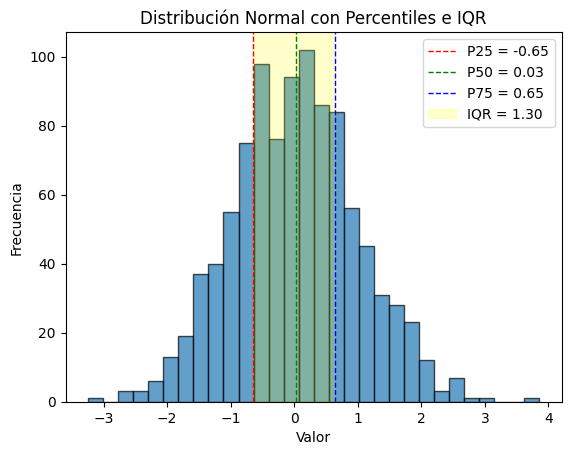

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos para una distribuci√≥n normal
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Calcular los percentiles 25, 50 y 75
Q1 = np.percentile(data_normal, 25)
Q2 = np.percentile(data_normal, 50)  # Mediana
Q3 = np.percentile(data_normal, 75)

# Calcular el IQR
IQR = Q3 - Q1

# Crear el histograma
plt.hist(data_normal, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1:.2f}')
plt.axvline(Q2, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3:.2f}')

# Mostrar el IQR
plt.axvspan(Q1, Q3, alpha=0.2, color='yellow', label=f'IQR = {IQR:.2f}')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n Normal con Percentiles e IQR')
plt.legend()

# Mostrar el gr√°fico
plt.show()


#### Distribuci√≥n Sesgada

La mediana es una mejor medida de la tendencia central que la media, y el rango intercuart√≠lico proporciona una buena medida de la dispersi√≥n.

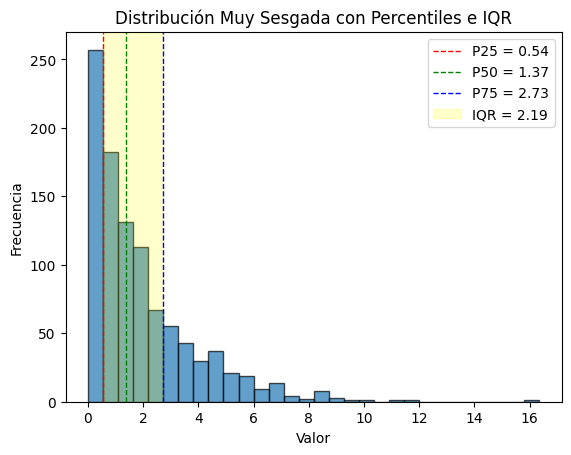

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos para una distribuci√≥n muy sesgada (exponencial)
data_skewed = np.random.exponential(scale=2, size=1000)

# Calcular los percentiles 25, 50 y 75
Q1 = np.percentile(data_skewed, 25)
Q2 = np.percentile(data_skewed, 50)  # Mediana
Q3 = np.percentile(data_skewed, 75)

# Calcular el IQR
IQR = Q3 - Q1

# Crear el histograma
plt.hist(data_skewed, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1:.2f}')
plt.axvline(Q2, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3:.2f}')

# Mostrar el IQR
plt.axvspan(Q1, Q3, alpha=0.2, color='yellow', label=f'IQR = {IQR:.2f}')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n Muy Sesgada con Percentiles e IQR')
plt.legend()

# Mostrar el gr√°fico
plt.show()


#### Distribuci√≥n Multimodal

Los percentiles ayudan a entender c√≥mo se distribuyen los datos en torno a los diferentes modos.

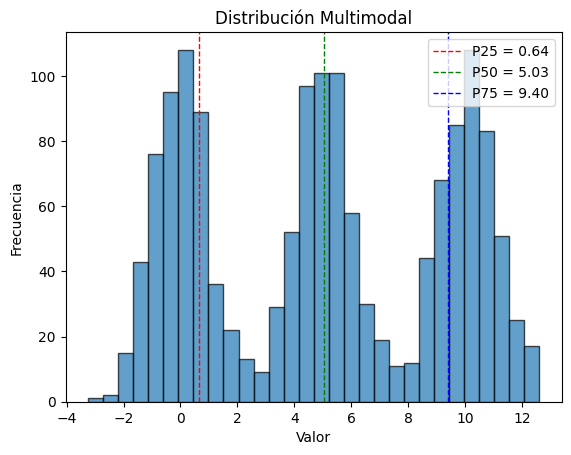

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos multimodales
data1 = np.random.normal(loc=0, scale=1, size=500)
data2 = np.random.normal(loc=5, scale=1, size=500)
data3 = np.random.normal(loc=10, scale=1, size=500)

# Combinar los datos
data = np.concatenate([data1, data2, data3])

# Calcular los percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

# Crear el histograma
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(p25, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {p25:.2f}')
plt.axvline(p50, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {p50:.2f}')
plt.axvline(p75, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {p75:.2f}')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n Multimodal')
plt.legend()

# Mostrar el gr√°fico
plt.show()


### Boxplots

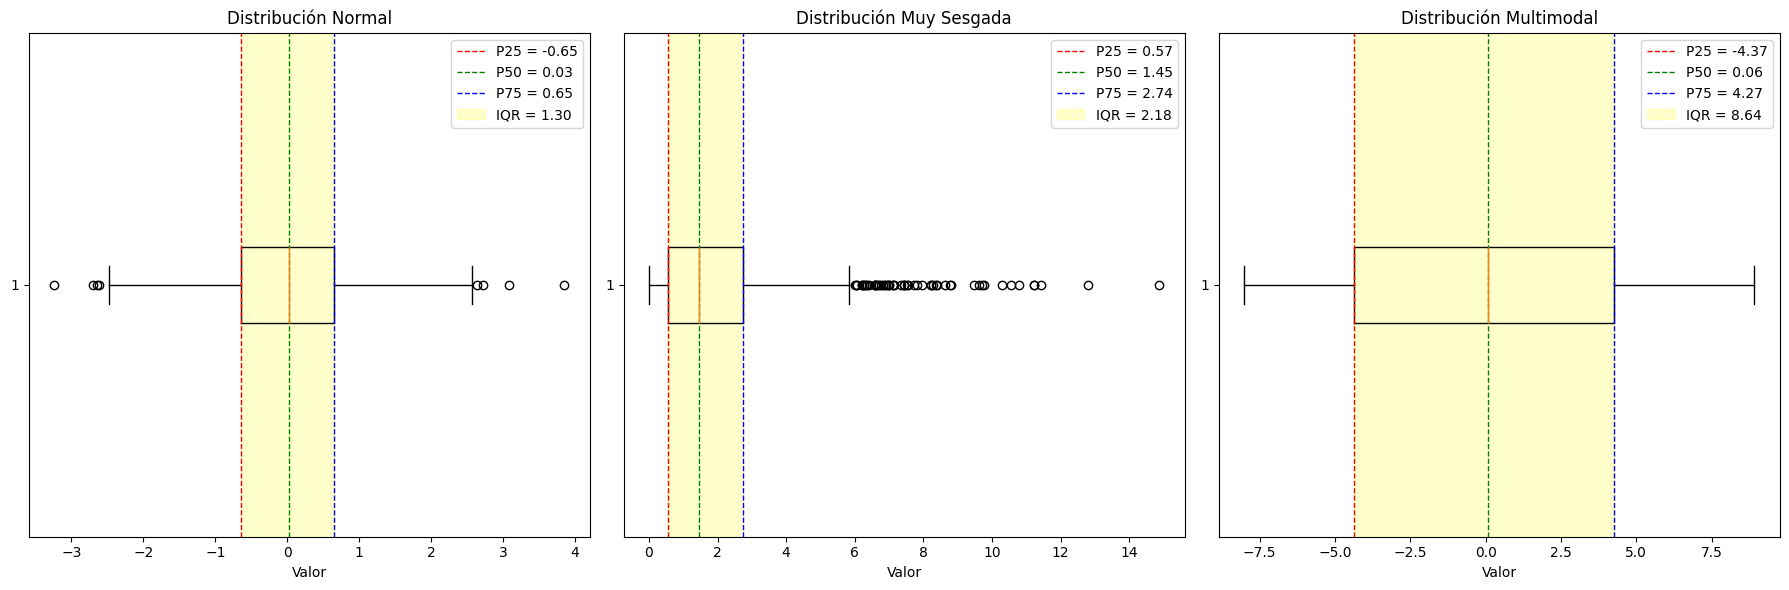

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
# Distribuci√≥n Normal
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Distribuci√≥n Muy Sesgada (Exponencial)
data_skewed = np.random.exponential(scale=2, size=1000)

# Distribuci√≥n Multimodal m√°s pronunciada
data1 = np.random.normal(loc=-5, scale=1, size=500)
data2 = np.random.normal(loc=0, scale=1, size=500)
data3 = np.random.normal(loc=5, scale=1, size=500)
data_multimodal = np.concatenate([data1, data2, data3])

# Calcular percentiles y IQR para cada distribuci√≥n
def calculate_iqr_percentiles(data):
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)  # Mediana
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    return Q1, Q2, Q3, IQR

Q1_normal, Q2_normal, Q3_normal, IQR_normal = calculate_iqr_percentiles(data_normal)
Q1_skewed, Q2_skewed, Q3_skewed, IQR_skewed = calculate_iqr_percentiles(data_skewed)
Q1_multimodal, Q2_multimodal, Q3_multimodal, IQR_multimodal = calculate_iqr_percentiles(data_multimodal)

# Crear los boxplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para la Distribuci√≥n Normal
axs[0].boxplot(data_normal, vert=False)
axs[0].axvline(Q1_normal, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1_normal:.2f}')
axs[0].axvline(Q2_normal, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2_normal:.2f}')
axs[0].axvline(Q3_normal, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3_normal:.2f}')
axs[0].axvspan(Q1_normal, Q3_normal, alpha=0.2, color='yellow', label=f'IQR = {IQR_normal:.2f}')
axs[0].set_title('Distribuci√≥n Normal')
axs[0].set_xlabel('Valor')
axs[0].legend()

# Boxplot para la Distribuci√≥n Muy Sesgada
axs[1].boxplot(data_skewed, vert=False)
axs[1].axvline(Q1_skewed, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1_skewed:.2f}')
axs[1].axvline(Q2_skewed, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2_skewed:.2f}')
axs[1].axvline(Q3_skewed, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3_skewed:.2f}')
axs[1].axvspan(Q1_skewed, Q3_skewed, alpha=0.2, color='yellow', label=f'IQR = {IQR_skewed:.2f}')
axs[1].set_title('Distribuci√≥n Muy Sesgada')
axs[1].set_xlabel('Valor')
axs[1].legend()

# Boxplot para la Distribuci√≥n Multimodal
axs[2].boxplot(data_multimodal, vert=False)
axs[2].axvline(Q1_multimodal, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1_multimodal:.2f}')
axs[2].axvline(Q2_multimodal, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2_multimodal:.2f}')
axs[2].axvline(Q3_multimodal, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3_multimodal:.2f}')
axs[2].axvspan(Q1_multimodal, Q3_multimodal, alpha=0.2, color='yellow', label=f'IQR = {IQR_multimodal:.2f}')
axs[2].set_title('Distribuci√≥n Multimodal')
axs[2].set_xlabel('Valor')
axs[2].legend()

# Mostrar los gr√°ficos
plt.tight_layout()
plt.show()


>  **Ejercicio 4** Con la misma dataset de los ejercicios anteriores (`states.csv`), calcular los percentiles 25, 50 y 75. Calcular tambien el rango y el IQR para la variable poblaci√≥n. Calcular/detectar outliers usando MAD y usando el criterio de Tukey (investigar)  Realizar dos gr√°ficos. El primero: Un histograma que muestre los percentiles y el IQR. El segundo gr√°fico un boxplot (diagrama de caja y bigote) que muestre los outliers. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
state = pd.read_csv('state.csv')

## Explorando la Distribuci√≥n de los Datos

### Percentiles y Diagramas de Caja

En la secci√≥n anterior, exploramos c√≥mo los percentiles pueden usarse para medir la dispersi√≥n de los datos. Los percentiles tambi√©n son valiosos para resumir la distribuci√≥n completa. Es com√∫n reportar los cuartiles (percentiles 25, 50 y 75) y los deciles (percentiles 10, 20, ..., 90). Los percentiles son especialmente valiosos para resumir los extremos (la gama exterior) de la distribuci√≥n. La cultura popular ha acu√±ado el t√©rmino "one-percenters" para referirse a las personas en el percentil 99 superior de riqueza.

La Tabla 1-4 muestra algunos percentiles de la tasa de asesinatos por estado.

```python
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])


| 5%   | 25%  | 50%  | 75%  | 95%  |
|------|------|------|------|------|
| 1.60 | 2.42 | 4.00 | 5.55 | 6.51 |


La mediana es de 4 asesinatos por cada 100,000 personas, aunque hay bastante variabilidad: el percentil 5 es solo 1.6 y el percentil 95 es 6.51.

Los diagramas de caja, introducidos por Tukey, se basan en percentiles y ofrecen una forma r√°pida de visualizar la distribuci√≥n de los datos. La Figura 1-2 muestra un diagrama de caja de la poblaci√≥n por estado.


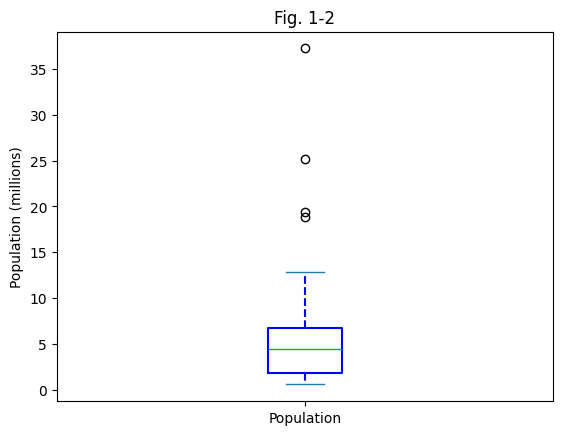

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

boxprops = dict(linestyle='-', linewidth=1.5, color='blue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='blue')
ax = (state['Population'] / 1_000_000).plot.box(boxprops=boxprops, whiskerprops=whiskerprops)
ax.set_ylabel('Population (millions)')
ax.set_title('Fig. 1-2')
plt.show()

A partir de este diagrama de caja, podemos ver inmediatamente que la mediana de la poblaci√≥n estatal es de aproximadamente 5 millones, la mitad de los estados se encuentran entre aproximadamente 2 millones y 7 millones, y hay algunos outliers con alta poblaci√≥n. La parte superior e inferior de la caja son los percentiles 75 y 25, respectivamente. La mediana se muestra mediante la l√≠nea horizontal en la caja. Las l√≠neas discontinuas, denominadas "bigotes", se extienden desde la parte superior e inferior de la caja para indicar el rango de la mayor parte de los datos. 


### Tablas de Frecuencia e Histogramas

Una tabla de frecuencia de una variable divide el rango de la variable en intervalos igualmente espaciados y nos dice cu√°ntos valores caen dentro de cada intervalo. La siguiente serie muestra los intervalos junto al conteo de estados.

In [19]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

> **Ejercicio 5**. Convertir la serie de arriba en un dataframe con indices enteros

In [24]:
binnedPopulation = pd.cut(state['Population'], 20)
binnedPopulation.value_counts()

Population
(526935.67, 2398142.5]      15
(2398142.5, 4232659.0]       9
(4232659.0, 6067175.5]       9
(6067175.5, 7901692.0]       5
(7901692.0, 9736208.5]       4
(9736208.5, 11570725.0]      2
(11570725.0, 13405241.5]     2
(17074274.5, 18908791.0]     1
(18908791.0, 20743307.5]     1
(24412340.5, 26246857.0]     1
(35419439.5, 37253956.0]     1
(13405241.5, 15239758.0]     0
(20743307.5, 22577824.0]     0
(15239758.0, 17074274.5]     0
(26246857.0, 28081373.5]     0
(22577824.0, 24412340.5]     0
(28081373.5, 29915890.0]     0
(29915890.0, 31750406.5]     0
(31750406.5, 33584923.0]     0
(33584923.0, 35419439.5]     0
Name: count, dtype: int64

La Tabla 1-5 muestra una tabla de frecuencia de la poblaci√≥n por estado:

| BinNumber | BinRange                 | Count | States                                                                                       |
|-----------|--------------------------|-------|----------------------------------------------------------------------------------------------|
| 1         | (526935.67, 4232659.0]   | 24    | Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming, Oklahoma, Oregon |
| 2         | (4232659.0, 7901692.0]   | 14    | Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin, Massachusetts |
| 3         | (7901692.0, 11570725.0]  | 6     | Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia                                                                       |
| 4         | (11570725.0, 15239758.0] | 2     | Illinois, Pennsylvania                                                                                       |
| 5         | (15239758.0, 18908791.0] | 1     | Florida                                                                                           |
| 6         | (18908791.0, 22577824.0] | 1     | New York                                                                                           |
| 7         | (22577824.0, 26246857.0] | 1     | Texas                                                                                           |
| 8         | (33584923.0, 37253956.0] | 1     | California                                                                                           |
| 9         | (26246857.0, 29915890.0] | 0     |                                                                                              |
| 10        | (29915890.0, 33584923.0] | 0     |                                                                                              |


> **Ejercicio 6**. Utilice Pandas para obtener la tabla 1-5 dada arriba.

El estado menos poblado es Wyoming, con 563,626 personas, y el m√°s poblado es California, con 37,253,956 personas. Esto nos da un rango de 37,253,956 ‚Äì 563,626 = 36,690,330, que debemos dividir en bins de tama√±o igual‚Äîdigamos 10 bins. Con 10 bins de tama√±o igual, cada bin tendr√° un ancho de 3,669,033, por lo que el primer bin abarcar√° de 563,626 a 4,232,658. Por el contrario, el bin superior, de 33,584,923 a 37,253,956, tiene solo un estado: California. Los dos bins inmediatamente debajo de California est√°n vac√≠os, hasta que llegamos a Texas. Es importante incluir los bins vac√≠os; el hecho de que no haya valores en esos bins es informaci√≥n √∫til. Tambi√©n puede ser √∫til experimentar con diferentes tama√±os de bins. Si son demasiado grandes, se pueden ocultar caracter√≠sticas importantes de la distribuci√≥n. Si son demasiado peque√±os, el resultado es demasiado granular y se pierde la capacidad de ver el panorama general.

Tanto las tablas de frecuencia como los percentiles resumen los datos creando bins. En general, los cuartiles y deciles tendr√°n el mismo conteo en cada bin (bins de conteo igual), pero los tama√±os de los bins ser√°n diferentes. La tabla de frecuencia, por el contrario, tendr√° diferentes conteos en los bins (bins de tama√±o igual), y los tama√±os de los bins ser√°n los mismos.

Un histograma es una forma de visualizar una tabla de frecuencia, con bins en el eje x y el conteo de datos en el eje y. Por ejemplo, el bin centrado en 10 millones (1e+07) va desde aproximadamente 8 millones hasta 12 millones, y hay seis estados en ese bin. pandas soporta histogramas para data frames con el m√©todo `DataFrame.plot.hist`. Use el argumento bins para definir el n√∫mero de bins. Los diversos m√©todos de trazado devuelven un objeto de eje que permite ajustar a√∫n m√°s la visualizaci√≥n usando `Matplotlib`:  

Text(0.5, 1.0, 'Fig. 1-3')

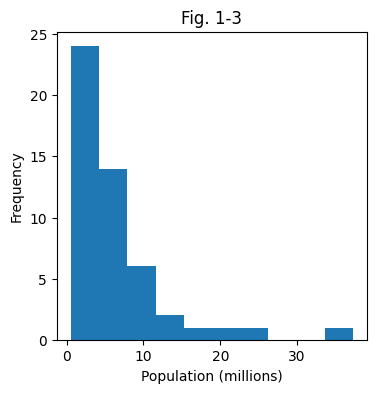

In [50]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
ax.set_title('Fig. 1-3')

El histograma que se muestra en la figura de arriba (Figura 1-3) se trazan de tal manera que:

- Se incluyen bins vac√≠os en el gr√°fico.
- Los bins tienen el mismo ancho.
- El n√∫mero de bins (o, de manera equivalente, el tama√±o del bin) depende del usuario.
- Las barras son contiguas‚Äîno hay espacio vac√≠o entre las barras, a menos que haya un bin vac√≠o.


### Momentos Estad√≠sticos

En la teor√≠a estad√≠stica, la ubicaci√≥n y la variabilidad se refieren a los primeros y segundos momentos de una distribuci√≥n. Los terceros y cuartos momentos se denominan asimetr√≠a (`skewness`) y curtosis (`kurtosis`). La asimetr√≠a se refiere a si los datos est√°n sesgados hacia valores m√°s grandes o m√°s peque√±os, y la curtosis indica la propensi√≥n de los datos a tener valores extremos. Generalmente, no se utilizan m√©tricas para medir la asimetr√≠a y la curtosis; en su lugar, se descubren a trav√©s de representaciones visuales como las Figuras 1-2 y 1-3.

### Gr√°ficas de Densidad y Estimaciones

Relacionado con el histograma est√° la gr√°fica de densidad, que muestra la distribuci√≥n de los valores de los datos como una l√≠nea continua. Una gr√°fica de densidad puede considerarse como un histograma suavizado, aunque t√≠picamente se calcula directamente a partir de los datos a trav√©s de una estimaci√≥n de densidad del kernel (KDE). La Figura 1-4 muestra una estimaci√≥n de densidad superpuesta a un histograma.


Pandas proporciona el m√©todo `density` para crear una gr√°fica de densidad. Use el argumento `bw_method` para controlar la suavidad de la curva de densidad:

Text(0.5, 1.0, 'Fig 1-4')

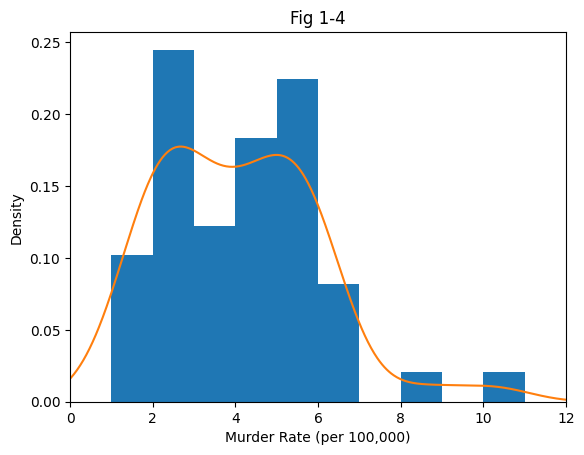

In [7]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
# Las funciones de trazado a menudo toman un argumento opcional de eje (ax), 
# lo que har√° que el gr√°fico se a√±ada al mismo plot (histograma).

ax.set_xlabel('Murder Rate (per 100,000)')
ax.set_title('Fig 1-4')


## Histograma vs. Gr√°fica de Densidad

### Histograma:

- Un histograma es una representaci√≥n gr√°fica de la distribuci√≥n de datos mediante barras.
- En el histograma, el eje `y` representa los conteos de frecuencia, es decir, cu√°ntos datos caen en cada bin.
- Por ejemplo, si tienes un bin que cubre valores de 1 a 2 y hay 5 datos en ese rango, la altura de la barra para ese bin ser√° 5.

### Gr√°fica de Densidad:

- Una gr√°fica de densidad es una versi√≥n suavizada del histograma, que muestra una l√≠nea continua en lugar de barras.
- En una gr√°fica de densidad, el eje y representa la densidad de probabilidad, no los conteos de frecuencia.
- La densidad de probabilidad es una medida que indica la probabilidad de que una variable aleatoria tome un valor dentro de un intervalo determinado.
- La clave aqu√≠ es que el √°rea total bajo la curva de densidad es igual a 1. Esto significa que si sumas todas las √°reas bajo la curva, obtendr√°s 1, lo que representa el 100% de la probabilidad.

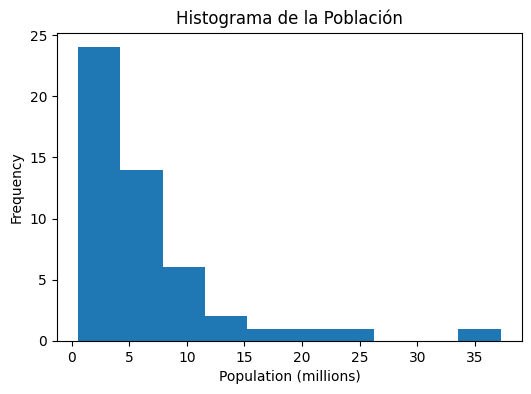

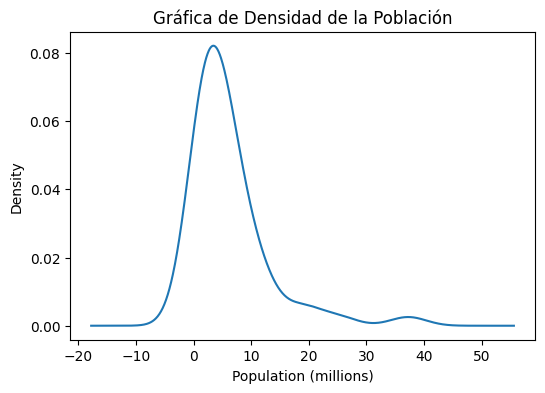

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
state = pd.read_csv('state.csv')

# Crear el histograma
ax_hist = (state['Population'] / 1_000_000).plot.hist(figsize=(6, 4))
ax_hist.set_xlabel('Population (millions)')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Histograma de la Poblaci√≥n')
plt.show()

# Crear la gr√°fica de densidad
ax_density = (state['Population'] / 1_000_000).plot.density(figsize=(6, 4))
ax_density.set_xlabel('Population (millions)')
ax_density.set_ylabel('Density')
ax_density.set_title('Gr√°fica de Densidad de la Poblaci√≥n')
plt.show()

### Resumen
Un histograma de frecuencias traza los conteos de frecuencia en el eje y y los valores de la variable en el eje x; proporciona una idea de la distribuci√≥n de los datos de un vistazo.
- Una tabla de frecuencias es una versi√≥n tabular de los conteos de frecuencia que se encuentran en un histograma.
- Un diagrama de ca en cambio, a, con la parte superior e inferior de la caja en los percentiles 75 y 25, respectivamente, tambi√©n proporciona una idea r√°pida de la distribuci√≥n de los datos; a menudo se utiliza en pantallas lado a lado para comparar distribuciones.
- Una gr√°fica de densidad es una versi√≥n suavizada de un histograma; requiere una funci√≥n para estimar una gr√°fica basada en los datos (por supuesto, son posibles m√∫ltiples estimaciones).


## Representaci√≥n de Datos Binarios y Categ√≥ricos

Para los datos categ√≥ricos, las proporciones o porcentajes simples cuentan la historia de los datos.

### T√©rminos Clave para Explorar Datos Categ√≥ricos

**Moda**  
La categor√≠a o valor que ocurre con mayor frecuencia en un conjunto de datos.

**Valor Esperado**  
Cuando las categor√≠as pueden asociarse con un valor num√©rico, esto proporciona un valor promedio basado en la probabilidad de ocurrencia de una categor√≠a.

**Gr√°ficos de Barras**  
La frecuencia o proporci√≥n de cada categor√≠a trazada como barras.

**Gr√°ficos de Pastel**  
La frecuencia o proporci√≥n de cada categor√≠a trazada como cu√±as en un pastel.

Obtener un resumen de una variable binaria o una variable categ√≥rica con algunas categor√≠as es una cuesti√≥n bastante sencilla: solo necesitamos averiguar la proporci√≥n de 1s, o las proporciones de las categor√≠as importantes. Por ejemplo, la Tabla 1-6 muestra el porcentaje de vuelos retrasados por la causa del retraso en el Aeropuerto de Dallas/Fort Worth desde 2010. Los retrasos se categorizan como debidos a factores bajo el control del transportista, retrasos del sistema de control del tr√°fico a√©reo (ATC), clima, seguridad, o una aeronave entrante tard√≠a.


### Tabla 1-6. Porcentaje de retrasos por causa en el Aeropuerto de Dallas/Fort Worth

| Carrier | ATC   | Weather | Security | Inbound |
|---------|-------|---------|----------|---------|
| 23.02%  | 30.40%| 4.03%   | 0.12%    | 42.43%  |


In [30]:
dfw = pd.read_csv('dfw_airline.csv')
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


- **Carrier (Transportista)**:
  - Esta columna muestra el porcentaje de retrasos causados por factores bajo el control de la aerol√≠nea o transportista. Esto puede incluir problemas operacionales, personal, mantenimiento, etc. En este caso, el 23.02% de los retrasos son atribuibles al transportista.

- **ATC (Control de Tr√°fico A√©reo)**:
  - Esta columna representa el porcentaje de retrasos causados por el sistema de control de tr√°fico a√©reo. Estos retrasos pueden ocurrir debido a congesti√≥n en el espacio a√©reo, problemas de gesti√≥n del tr√°fico a√©reo, etc. Aqu√≠, el 30.40% de los retrasos son debido a ATC.

- **Weather (Clima)**:
  - Esta columna indica el porcentaje de retrasos causados por condiciones meteorol√≥gicas adversas, como tormentas, niebla, nieve, etc. En este caso, el 4.03% de los retrasos son atribuibles al clima.

- **Security (Seguridad)**:
  - Esta columna muestra el porcentaje de retrasos causados por medidas de seguridad, como inspecciones adicionales, procedimientos de seguridad, amenazas de seguridad, etc. En este caso, el 0.12% de los retrasos son debido a problemas de seguridad.

- **Inbound (Aeronave Entrante)**:
  - Esta columna representa el porcentaje de retrasos causados por la llegada tard√≠a de la aeronave entrante. Esto puede suceder si un vuelo anterior llega tarde, afectando la salida programada del siguiente vuelo. Aqu√≠, el 42.43% de los retrasos son debido a aeronaves entrantes tard√≠as.

Los gr√°ficos de barras (bar charts), que se ven a menudo en la prensa popular, son una herramienta visual com√∫n para mostrar una √∫nica variable categ√≥rica. Las categor√≠as se enumeran en el eje x y las frecuencias o proporciones en el eje y. Pandas tambi√©n admite gr√°ficos de barras para data frames:



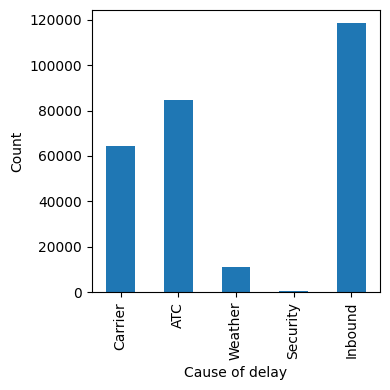

Text(0.5, 1.0, 'Fig 1-5')

In [49]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()
ax.set_title('Fig 1-5')

Tenga en cuenta que un gr√°fico de barras se asemeja a un histograma; en un gr√°fico de barras, el eje x representa diferentes categor√≠as de una variable de factor, mientras que en un histograma, el eje x representa valores de una sola variable en una escala num√©rica. En un histograma, las barras generalmente se muestran toc√°ndose entre s√≠, con espacios que indican valores que no ocurrieron en los datos. En un gr√°fico de barras, las barras se muestran separadas entre s√≠.


### Moda

La moda es el valor‚Äîo valores en caso de empate‚Äîque aparece con mayor frecuencia en los datos. Por ejemplo, la moda de la causa de retraso en el aeropuerto de Dallas/Fort Worth es `"Inbound"`. Como otro ejemplo, en la mayor√≠a de las partes de los Estados Unidos, la moda para la preferencia religiosa ser√≠a cristiana. La moda es una estad√≠stica resumida simple para datos categ√≥ricos y, en general, no se utiliza para datos num√©ricos.

### Valor Esperado

Un tipo especial de datos categ√≥ricos es aquel en el que las categor√≠as representan o pueden asignarse a valores discretos en la misma escala. Un comercializador de una nueva tecnolog√≠a en la nube, por ejemplo, ofrece dos niveles de servicio, uno con un precio de $300\$/mes$ y otro con un precio de $50\$/mes$.  
El comercializador ofrece seminarios web gratuitos para generar clientes potenciales, y la empresa calcula que el $5\%$ de los asistentes se suscribir√° al servicio de 300 dolares, el $15\%$ se suscribir√° al servicio de 50 d√≥lares y el $80\%$ no se suscribir√° a nada. Estos datos pueden resumirse, para fines financieros, en un √∫nico "valor esperado", que es una forma de media ponderada, en la que los pesos son probabilidades.

### Valor Esperado

El valor esperado se calcula de la siguiente manera:
1. Multiplicar cada resultado por su probabilidad de ocurrencia.
2. Sumar estos valores.

En el ejemplo del servicio en la nube, el valor esperado de un asistente a un seminario web es de $22.50 por mes, calculado de la siguiente manera:

<div style="text-align: center;">
\[ EV = 0.05 \times 300 + 0.15 \times 50 + 0.80 \times 0 = 22.5 \]
</div>

El valor esperado es realmente una forma de media ponderada: a√±ade las ideas de expectativas futuras y pesos de probabilidad, a menudo basados en el juicio subjetivo. El valor esperado es un concepto fundamental en la valoraci√≥n empresarial y la planificaci√≥n de inversiones, por ejemplo, el valor esperado de cinco a√±os de beneficios de una nueva adquisici√≥n o los ahorros de costos esperados de un nuevo software de gesti√≥n de pacientes en una cl√≠nica.


El valor esperado es una medida fundamental en probabilidad y estad√≠sticas que se utiliza para predecir el resultado promedio de un conjunto de eventos probabil√≠sticos. Se calcula ponderando cada posible resultado por su probabilidad de ocurrencia y sumando estos valores ponderados.

#### Pasos para Calcular el Valor Esperado

1. **Identificar los Resultados y sus Probabilidades**:
   - Cada posible resultado de un experimento o evento debe tener una probabilidad asociada.

2. **Multiplicar Cada Resultado por su Probabilidad de Ocurrencia**:
   - Para cada resultado, multiplicamos su valor por la probabilidad de que ocurra.

3. **Sumar los Valores Ponderados**:
   - Sumamos todos los valores ponderados obtenidos en el paso anterior para obtener el valor esperado.

### Ejemplo Detallado: Juego de Loter√≠a

Supongamos que estamos analizando un simple juego de loter√≠a. El costo de un boleto es $10, y hay tres posibles premios:
- Un premio de \$100 con una probabilidad de 1\%.
- Un premio de \$50 con una probabilidad de 2\%.
- Un premio de \$20 con una probabilidad de 5\%.
- No ganar nada con una probabilidad de 92\%.

Queremos calcular el valor esperado de las ganancias por boleto.

#### Paso 1: Identificar los Resultados y sus Probabilidades

- Ganar \$100: Probabilidad = 0.01
- Ganar \$50: Probabilidad = 0.02
- Ganar \$20: Probabilidad = 0.05
- Ganar \$0: Probabilidad = 0.92

#### Paso 2: Multiplicar Cada Resultado por su Probabilidad de Ocurrencia

- Ganancia ponderada por ganar \$100:
<div style="text-align: center;">
  \[   100 \times 0.01 = 1   \]  
</div>
- Ganancia ponderada por ganar \$50:
<div style="text-align: center;">
    \[   50 \times 0.02 = 1   \]
</div>
- Ganancia ponderada por ganar \$20:
<div style="text-align: center;">
      \[   20 \times 0.05 = 1   \]
</div>

- Ganancia ponderada por ganar \$0:
<div style="text-align: center;">
    \[ 0 \times 0.92 = 0   \]
</div>

#### Paso 3: Sumar los Valores Ponderados

Sumamos todas las ganancias ponderadas para obtener el valor esperado:

<div style="text-align: center;">
\[ EV = 1 + 1 + 1 + 0 = 3 \]
</div>

Finalmente, para obtener la ganancia neta esperada, restamos el costo del boleto ($10):

<div style="text-align: center;">
\[ EV_{\text{neto}} = 3 - 10 = -7 \]
</div>

### Interpretaci√≥n del Resultado

El valor esperado neto de `-7 dolares` significa que, en promedio, se espera perder \$7 por cada boleto comprado en este juego de loter√≠a. Aunque es posible ganar dinero, las probabilidades est√°n estructuradas de tal manera que las p√©rdidas promedio superan las ganancias promedio.


### Aplicaci√≥n del Valor Esperado en Negocios

El valor esperado se utiliza ampliamente en negocios y finanzas para la toma de decisiones. Algunos ejemplos incluyen:
- **Valoraci√≥n de Proyectos**: Estimar los ingresos esperados de un nuevo proyecto o inversi√≥n.
- **Gesti√≥n de Riesgos**: Calcular el valor esperado de p√©rdidas en escenarios de riesgo.
- **Planificaci√≥n de Presupuestos**: Prever los costos y beneficios futuros esperados para la planificaci√≥n financiera.

El valor esperado es una herramienta poderosa que ayuda a tomar decisiones informadas basadas en probabilidades y resultados ponderados.

### Correlaci√≥n

El an√°lisis exploratorio de dat `EDA`os en muchos proyectos de modelado (ya sea en ciencia de datos o en investigaci√≥n) implica examinar la correlaci√≥n entre predictor, ees decir correlaci√≥n y entre predictores y una variable objetivo. Se dice que las variables X e Y (cada una con datos medidos) est√°n positivamente correlacionadas si los valores altos de X van acompa√±ados de valores altos de Y, y los valores bajos de X van acompa√±ados de valores bajos de Y. Si los valores altos de X van acompa√±ados de valores bajos de Y, y viceversa, las variables est√°n negativamente correlacionada.


### T√©rminos Clave para la Correlaci√≥n

**Coeficiente de Correlaci√≥n**
Una m√©trica que mide la magnitud en la que las variables num√©ricas est√°n asociadas entre s√≠ (rango de ‚Äì1 a +1).

El coeficiente de correlaci√≥n es una m√©trica que cuantifica la relaci√≥n entre dos variables num√©ricas, se usa para determinar tanto la fuerza como la direcci√≥n de la relaci√≥n lineal entre las variables.

#### Valores del Coeficiente de Correlaci√≥n

- **+1**: Indica una correlaci√≥n perfectamente positiva. A medida que una variable aumenta, la otra tambi√©n aumenta en proporci√≥n constante. Todos los puntos en un gr√°fico de dispersi√≥n caer√≠an exactamente en una l√≠nea recta ascendente.
- **0**: Indica que no hay correlaci√≥n lineal entre las variables. Los puntos en un gr√°fico de dispersi√≥n estar√≠an dispersos de manera que no formar√≠an ning√∫n patr√≥n lineal.
- **-1**: Indica una correlaci√≥n perfectamente negativa. A medida que una variable aumenta, la otra disminuye en proporci√≥n constante. Todos los puntos en un gr√°fico de dispersi√≥n caer√≠an exactamente en una l√≠nea recta descendente.

#### Interpretaci√≥n de la Magnitud del Coeficiente de Correlaci√≥n

- **0.9 a 1.0 (o -0.9 a -1.0)**: Correlaci√≥n muy fuerte
- **0.7 a 0.9 (o -0.7 a -0.9)**: Correlaci√≥n fuerte
- **0.5 a 0.7 (o -0.5 a -0.7)**: Correlaci√≥n moderada
- **0.3 a 0.5 (o -0.3 a -0.5)**: Correlaci√≥n d√©bil
- **0.0 a 0.3 (o 0.0 a -0.3)**: Correlaci√≥n muy d√©bil o inexistente

#### F√≥rmula del Coeficiente de Correlaci√≥n de Pearson

El coeficiente de correlaci√≥n m√°s com√∫nmente usado es el coeficiente de correlaci√≥n de Pearson, que se calcula usando la siguiente f√≥rmula:

<div style="text-align: center;">
  \[
  r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
  \]
</div>

donde:
- \( $r$ \) es el coeficiente de correlaci√≥n de Pearson.
- \( $x_i$ \) y \( $y_i$ \) son los valores individuales de las variables \( X \) e \( Y \).
- \( $\bar{x}$ \) y \( $\bar{y}$ \) son las medias de las variables \( X \) e \( Y \), respectivamente.

**Matriz de Correlaci√≥n**
Una tabla donde las variables se muestran tanto en las filas como en las columnas, y los valores de las celdas son las correlaciones entre las variables.  

La Tabla 1-7, llamada matriz de correlaci√≥n, muestra la correlaci√≥n entre los rendimientos diarios de las acciones de telecomunicaciones desde julio de 2012 hasta junio de 2015. En la tabla, se puede ver que Verizon (VZ) y ATT (T) tienen la correlaci√≥n m√°s alta. Level 3 (LVLT), que es una empresa de infraestructura, tiene la correlaci√≥n m√°s baja con las dem√°s. Nota la diagonal de 1s (la correlaci√≥n de una acci√≥n consigo misma es 1) y la redundancia de la informaci√≥n por encima y por debajo de la diagonal.

### Tabla 1-7. Correlaci√≥n entre los rendimientos de las acciones de telecomunicaciones

|       | T     | CTL   | FTR   | VZ    | LVLT  |
|-------|-------|-------|-------|-------|-------|
| **T**   | 1.000 | 0.475 | 0.328 | 0.678 | 0.279 |
| **CTL** | 0.475 | 1.000 | 0.420 | 0.417 | 0.287 |
| **FTR** | 0.328 | 0.420 | 1.000 | 0.287 | 0.260 |
| **VZ**  | 0.678 | 0.417 | 0.287 | 1.000 | 0.242 |
| **LVLT**| 0.279 | 0.287 | 0.260 | 0.242 | 1.000 |



La Tabla 1-7 muestra la correlaci√≥n entre los rendimientos diarios de varias acciones de telecomunicaciones. A continuaci√≥n se explican las siglas de las empresas que aparecen en la tabla:

- **T**: AT&T Inc.
  - AT&T es una de las compa√±√≠as de telecomunicaciones m√°s grandes del mundo, ofreciendo servicios de telefon√≠a fija y m√≥vil, as√≠ como servicios de internet y televisi√≥n.

- **CTL**: CenturyLink, Inc.
  - CenturyLink, ahora conocido como Lumen Technologies, es una empresa de telecomunicaciones que proporciona servicios de voz, datos y video en todo el mundo.

- **FTR**: Frontier Communications Corporation
  - Frontier Communications es una empresa de telecomunicaciones que ofrece servicios de voz, banda ancha y video, principalmente en √°reas rurales y suburbanas de los Estados Unidos.

- **VZ**: Verizon Communications Inc.
  - Verizon es una empresa de telecomunicaciones que proporciona servicios de comunicaci√≥n y tecnolog√≠a, incluyendo servicios de telefon√≠a m√≥vil y fija, internet y televisi√≥n.

- **LVLT**: Level 3 Communications, Inc.
  - Level 3 Communications, ahora parte de CenturyLink (Lumen Technologies), es una empresa de infraestructura que ofrece servicios de red y datos a empresas, gobiernos y otros operadores de telecomunicaciones.

Estas siglas representan algunas de las principales compa√±√≠as de telecomunicaciones, y la tabla muestra c√≥mo los rendimientos diarios de sus acciones est√°n correlacionados entre s√≠.  

Una tabla de correlaciones como la Tabla 1-7 se traza com√∫nmente para mostrar visualmente la relaci√≥n entre m√∫ltiples variables. La Figura 1-6 muestra la correlaci√≥n entre los rendimientos diarios de los principales fondos cotizados en bolsa (ETFs). El siguiente c√≥digo demuestra esto utilizando el paquete `seaborn.heatmap`. 


In [34]:
import seaborn as sns
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)



In [35]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)



                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


A continuaci√≥n, nos enfocamos en los fondos negociados en las principales bolsas (sector == 'etf').


In [40]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

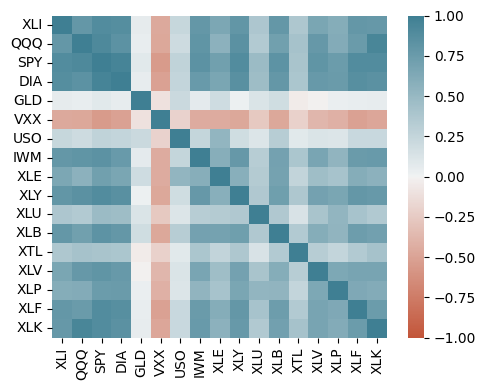

In [41]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

Los ETFs para el S&P 500 (SPY) y el √≠ndice Dow Jones (DIA) tienen una alta correlaci√≥n. Del mismo modo, el QQQ y el XLK, compuestos principalmente por empresas tecnol√≥gicas, est√°n positivamente correlacionados. Los ETFs defensivos, como los que rastrean los precios del oro (GLD), los precios del petr√≥leo (USO) o la volatilidad del mercado (VXX), tienden a estar d√©bilmente o negativamente correlacionados con los otros ETFs. 

C:\Users\juanj\AppData\Local\Temp\ipykernel_29716\1398409197.py:39: UserWarning: Adding colorbar to a different Figure <Figure size 500x400 with 2 Axes> than <Figure size 500x400 with 2 Axes> which fig.colorbar is called on.
  cb = fig.colorbar(m, ax=ax)


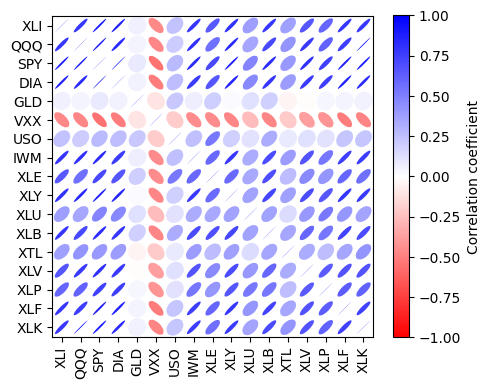

In [42]:
import numpy as np
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

La orientaci√≥n de la elipse indica si dos variables est√°n positivamente correlacionadas (la elipse apunta hacia la parte superior derecha) o negativamente correlacionadas (la elipse apunta hacia la parte superior izquierda). El sombreado y el ancho de la elipse indican la fuerza de la asociaci√≥n: las elipses m√°s delgadas y oscuras corresponden a relaciones m√°s fuertes.


Al igual que la media y la desviaci√≥n est√°ndar, el coeficiente de correlaci√≥n es sensible a los valores at√≠picos en los datos. Los paquetes de software ofrecen alternativas robustas al coeficiente de correlaci√≥n cl√°sico.Los m√©todos en el m√≥dulo sklearn.covariance de scikit-learn implementan una variedad de enfoques.


Los estad√≠sticos propusieron otros tipos de coeficientes de correlaci√≥n, como el rho de Spearman o el tau de Kendall. Estos son coeficientes de correlaci√≥n basados en el rango de los datos.Los rangos son posiciones de los datos cuando se ordenan de menor a mayor. Dado que trabajan con rangos en lugar de valores, estas estimaciones son robustas frente a valores at√≠picos y pueden manejar ciertos tipos de no linealidades. Sin embargo, los cient√≠ficos de datos generalmente pueden ce√±irse al coeficiente de correlaci√≥n de Pearson y sus alternativas robustas para el an√°lisis exploratorio. El atractivo de las estimaciones basadas en rangos es principalmente para conjuntos de datos m√°s peque√±os y pruebas de hip√≥tesis espec√≠ficas.


**Gr√°fico de Dispersi√≥n (Scatterplot)**
Un gr√°fico en el que el eje x representa el valor de una variable, y el eje y representa el valor de otra variable. Vea la Figura 1-7 para un gr√°fico de la correlaci√≥n entre los rendimientos diarios de ATT y Verizon.

Los gr√°ficos de dispersi√≥n simples son compatibles con pandas. Especificar el marcador como `$\u25EF$` usa un c√≠rculo abierto para cada punto.


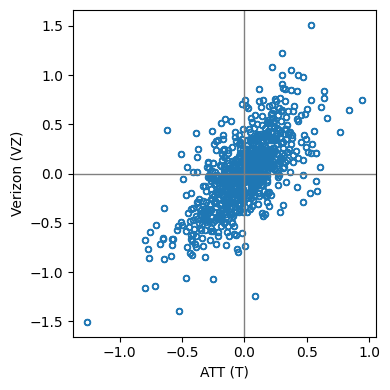

Text(0.5, 1.0, 'Fig 1-7')

In [47]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()
ax.set_title('Fig 1-7')

## Exploraci√≥n de Dos o M√°s Variables

Estimadores habituales como la media y la varianza analizan variables una a la vez (an√°lisis univariante). El an√°lisis de correlaci√≥n es un m√©todo importante que compara dos variables (an√°lisis bivariante). En esta secci√≥n, observamos estimaciones y gr√°ficos adicionales, y m√°s de dos variables (an√°lisis multivariante).

### T√©rminos Clave para la Exploraci√≥n de Dos o M√°s Variables

- **Tabla de Contingencia**:
  - Un recuento de frecuencias entre dos o m√°s variables categ√≥ricas.

- **Hexagonal Binning**:
  - Un gr√°fico de dos variables num√©ricas con los registros agrupados en hex√°gonos.

- **Gr√°fico de Contorno**:
  - Un gr√°fico que muestra la densidad de dos variables num√©ricas como un mapa topogr√°fico.

- **Gr√°fico de Viol√≠n**:  
  - Conocido como *Violin Plot* es un gr√°fico similar a un boxplot pero mostrando la estimaci√≥n de densidad.

Al igual que el an√°lisis univariante, el an√°lisis bivariante implica tanto el c√°lculo de estad√≠sticas resumen como la producci√≥n de visualizaciones. El tipo apropiado de an√°lisis bivariante o multivariante depende de la naturaleza de los datos: num√©ricos versus categ√≥ricos.

### Ejemplo de tabla de contingencia

Supongamos que tenemos los siguientes datos que muestran el nivel de educaci√≥n y el estado laboral de un grupo de personas:

| Educaci√≥n    | Estado Laboral | Recuento |
|--------------|----------------|----------|
| Secundaria   | Empleado       | 50       |
| Secundaria   | Desempleado    | 10       |
| Secundaria   | Estudiante     | 5        |
| Secundaria   | Retirado       | 5        |
| Preparatoria | Empleado       | 80       |
| Preparatoria | Desempleado    | 20       |
| Preparatoria | Estudiante     | 15       |
| Preparatoria | Retirado       | 5        |
| Licenciatura | Empleado       | 100      |
| Licenciatura | Desempleado    | 15       |
| Licenciatura | Estudiante     | 10       |
| Licenciatura | Retirado       | 5        |
| Postgrado    | Empleado       | 60       |
| Postgrado    | Desempleado    | 5        |
| Postgrado    | Estudiante     | 10       |
| Postgrado    | Retirado       | 5        |


Creamos una tabla de contingencia pivotando la tabla de arriba separando cada categoria del estado laboral en columnas diferentes.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

data = {
    'Educaci√≥n': [
        'Secundaria', 'Secundaria', 'Secundaria', 'Secundaria',
        'Preparatoria', 'Preparatoria', 'Preparatoria', 'Preparatoria',
        'Licenciatura', 'Licenciatura', 'Licenciatura', 'Licenciatura',
        'Postgrado', 'Postgrado', 'Postgrado', 'Postgrado'
    ],
    'Estado Laboral': [
        'Empleado', 'Desempleado', 'Estudiante', 'Retirado',
        'Empleado', 'Desempleado', 'Estudiante', 'Retirado',
        'Empleado', 'Desempleado', 'Estudiante', 'Retirado',
        'Empleado', 'Desempleado', 'Estudiante', 'Retirado'
    ],
    'Recuento': [
        50, 10, 5, 5,
        80, 20, 15, 5,
        100, 15, 10, 5,
        60, 5, 10, 5
    ]
}

# Creamos el DataFrame
df = pd.DataFrame(data)

In [21]:
# Crear tabla de contingencia
tabla_contingencia = pd.pivot_table(df, values='Recuento', index='Educaci√≥n', columns='Estado Laboral', aggfunc='sum', margins=True, margins_name='Total')

# Mostrar la tabla de contingencia
tabla_contingencia

Estado Laboral  Desempleado  Empleado  Estudiante  Retirado  Total
Educaci√≥n                                                         
Licenciatura             15       100          10         5    130
Postgrado                 5        60          10         5     80
Preparatoria             20        80          15         5    120
Secundaria               10        50           5         5     70
Total                    50       290          40        20    400

**Ejercicio 7** Crear un gr√°fico de barras con las categorias del estado laboral

o bien, podria haberse pivotado tomando como columnas en nivel de educaci√≥n:

In [22]:
# Crear tabla de contingencia con niveles de educaci√≥n como columnas
tabla_contingencia_1 = pd.pivot_table(df, values='Recuento', index='Estado Laboral', columns='Educaci√≥n', aggfunc='sum', margins=True, margins_name='Total')

# Mostrar la tabla de contingencia
tabla_contingencia_1

Educaci√≥n       Licenciatura  Postgrado  Preparatoria  Secundaria  Total
Estado Laboral                                                          
Desempleado               15          5            20          10     50
Empleado                 100         60            80          50    290
Estudiante                10         10            15           5     40
Retirado                   5          5             5           5     20
Total                    130         80           120          70    400

**Ejercicio 8** Crear un gr√°fico de barras con las categorias del nivel de eduaci√≥n

## Agrupamiento Hexagonal (Hexagonal Binning) y Contornos

Los gr√°ficos de dispersi√≥n (Scatterplots) son adecuados cuando hay un n√∫mero relativamente peque√±o de valores de datos. El gr√°fico de rendimientos de acciones en la Figura 1-7 implica solo unos 750 puntos. Para conjuntos de datos con cientos de miles o millones de registros, un gr√°fico de dispersi√≥n ser√° demasiado denso, por lo que necesitamos una forma diferente de visualizar la relaci√≥n.  
Para ilustrar esto, consideremos el conjunto de datos `kc_tax`, que contiene los valores evaluados de impuestos para propiedades residenciales en el condado de King, Washington.  




Para centrarnos en la parte principal de los datos, eliminamos las residencias muy caras y muy peque√±as o grandes utilizando la funci√≥n `subset`:

En pandas, filtramos el conjunto de datos de la siguiente manera:

In [43]:
kc_tax = pd.read_csv('kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.head()

TaxAssessedValue  SqFtTotLiving  ZipCode
1          206000.0           1870  98002.0
2          303000.0           1530  98166.0
3          361000.0           2000  98108.0
4          459000.0           3150  98108.0
5          223000.0           1570  98032.0

## Significado de Cada Columna en el Conjunto de Datos `kc_tax`

1. **TaxAssessedValue**:
   - **Significado**: Valor Fiscal Evaluado. Representa el valor de la propiedad seg√∫n la evaluaci√≥n fiscal realizada por el condado. Este valor es utilizado para calcular los impuestos a la propiedad que el propietario debe pagar.
     
2. **SqFtTotLiving**:
   - **Significado**: Metros Cuadrados Totales de Vivienda. Indica el √°rea total habitable de la propiedad en pies cuadrados. Incluye todas las √°reas habitables dentro de la propiedad, como habitaciones, cocina, ba√±os, etc.
     
3. **ZipCode**:
   - **Significado**: C√≥digo Postal. Contiene el c√≥digo postal de la ubicaci√≥n de la propiedad. El c√≥digo postal es una serie de n√∫meros que se utilizan para identificar una regi√≥n espec√≠fica dentro del condado, facilitando la localizaci√≥n de la propiedad.

Estos datos son t√≠picamente utilizados en an√°lisis inmobiliarios y fiscales para evaluar el mercado de la vivienda, analizar tendencias de precios y calcular impuestos sobre la propiedad.

In [44]:
print(kc_tax0.shape)

(432693, 3)


La Figura 1-8 es un gr√°fico de agrupamiento hexagonal que muestra la relaci√≥n entre los pies cuadrados terminados y el valor fiscal evaluado para las casas en el condado de King. En lugar de trazar puntos, que aparecer√≠an como una nube oscura monol√≠tica, agrupamos los registros en hex√°gonos y trazamos los hex√°gonos con un color que indica el n√∫mero de registros en ese hex√°gono. En este gr√°fico, la relaci√≥n positiva entre los pies cuadrados y el valor fiscal evaluado es clara.  
Una caracter√≠stica interesante es la indicaci√≥n de bandas adicionales por encima de la banda principal (la m√°s oscura) en la parte inferior, lo que indica casas que tienen la misma superficie en pies cuadrados que las de la banda principal, pero con un valor fiscal evaluado m√°s alto.


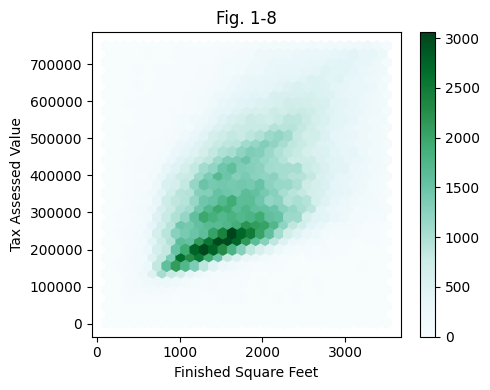

In [25]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
ax.set_title('Fig. 1-8')
plt.tight_layout()
plt.show()

La `Figura 1-9` utiliza contornos superpuestos a un gr√°fico de dispersi√≥n para visualizar la relaci√≥n entre dos variables num√©ricas. Los contornos son esencialmente un mapa topogr√°fico para dos variables; cada banda de contorno representa una densidad espec√≠fica de puntos, aumentando a medida que uno se acerca a un "pico". Este gr√°fico muestra una historia similar a la `Figura 1-8`: hay un pico secundario "al norte" del pico principal. 


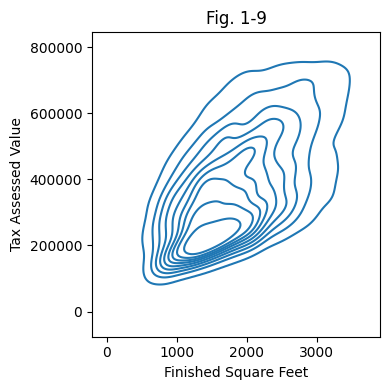

In [27]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
ax.set_title('Fig. 1-9')

plt.tight_layout()
plt.show()

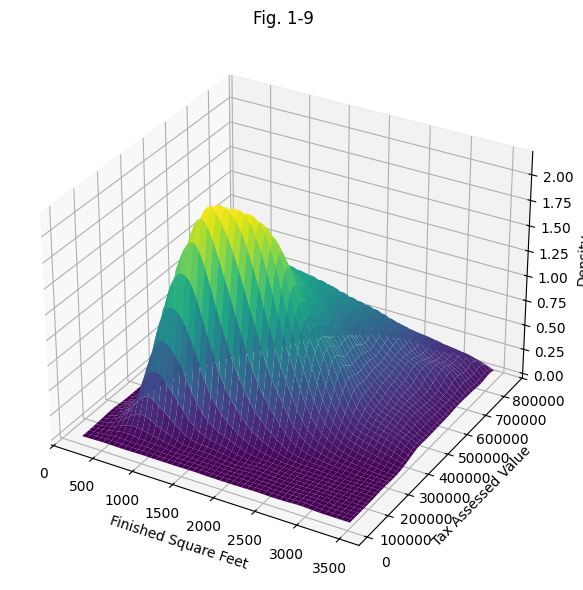

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import gaussian_kde

# Supongamos que kc_tax0 ya ha sido filtrado seg√∫n el ejemplo proporcionado previamente

# Tomar una muestra de los datos
sampled_data = kc_tax0.sample(10000)

# Preparar los datos para el gr√°fico 3D
x = sampled_data['SqFtTotLiving']
y = sampled_data['TaxAssessedValue']

# Calcular el KDE
kde = gaussian_kde([x, y])

# Crear una malla de cuadr√≠cula para el gr√°fico 3D
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_grid = kde(np.vstack([x_grid.ravel(), y_grid.ravel()])).reshape(x_grid.shape)

# Crear el gr√°fico de contornos en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie en 3D
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Configurar etiquetas y t√≠tulo
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
ax.set_zlabel('Density')
ax.set_title('Fig. 1-9')

plt.tight_layout()
plt.show()


#### An√°lisis con dos variables categ√≥ricas

Una forma √∫til de resumir dos variables categ√≥ricas es una tabla de contingencia, una tabla de recuentos por categor√≠a. La Tabla 1-8 muestra la tabla de contingencia entre la calificaci√≥n de un pr√©stamo personal y el resultado de ese pr√©stamo. Esto se toma de los datos proporcionados por Lending Club, un l√≠der en el negocio de pr√©stamos . La calificaci√≥n va de A (alta) a G (baja). El resultado es ya sea totalmente pagado, actual, atrasado o cancelado (no se espera recuperar el saldo del pr√©stamo). Esta tabla muestra el recuento y los porcentajes por fila. Los pr√©stamos de alta calificaci√≥n tienen un porcentaje muy bajo de atrasos/cancelaciones en comparaci√≥n con los pr√©stamos de menor calificaci√≥n.


### Tabla 1-8. Tabla de contingencia de la calificaci√≥n y el estado del pr√©stamo

| Grade | Charged off | Current | Fully paid | Late | Total |
|-------|-------------|---------|------------|------|-------|
| A     | 1562        | 50051   | 20408      | 469  | 72490 |
|       | 0.022       | 0.690   | 0.282      | 0.006| 0.161 |
| B     | 5302        | 93852   | 31160      | 2056 | 132370|
|       | 0.040       | 0.709   | 0.235      | 0.016| 0.294 |
| C     | 6023        | 88928   | 23147      | 2777 | 120875|
|       | 0.050       | 0.736   | 0.191      | 0.023| 0.268 |
| D     | 5007        | 53281   | 13681      | 2308 | 74277 |
|       | 0.067       | 0.717   | 0.184      | 0.031| 0.165 |
| E     | 2842        | 24639   | 5949       | 1374 | 34804 |
|       | 0.082       | 0.708   | 0.171      | 0.039| 0.077 |
| F     | 1526        | 8444    | 2328       | 606  | 12904 |
|       | 0.118       | 0.654   | 0.180      | 0.047| 0.029 |
| G     | 409         | 1990    | 643        | 199  | 3241  |
|       | 0.126       | 0.614   | 0.198      | 0.061| 0.007 |
| **Total** | 22671 | 321185 | 97316 | 9789 | 450961 |


**Ejercicio 8** Partiendo del dataset `lc_loans.csv` crear un dataframe que tenga la misma estructura de la `tabla 1-8` dada arriba.

### Significado de las Columnas de la Tabla 1-8

1. **Grade**:
   - **Significado**: Calificaci√≥n del Pr√©stamo. Indica la calificaci√≥n de riesgo del pr√©stamo, que va de A (alta) a G (baja). Una calificaci√≥n m√°s alta (A) sugiere un menor riesgo de incumplimiento, mientras que una calificaci√≥n m√°s baja (G) indica un mayor riesgo.  

2. **Charged off**:
   - **Significado**: Cancelado. Muestra el n√∫mero de pr√©stamos que han sido cancelados. Un pr√©stamo se considera "cancelado" cuando el prestamista ya no espera recuperar el saldo del pr√©stamo debido a que el prestatario no ha cumplido con los pagos.  

3. **Current**:
   - **Significado**: Al d√≠a.Muestra el n√∫mero de pr√©stamos que est√°n al d√≠a con sus pagos. Estos pr√©stamos est√°n siendo pagados seg√∫n el cronograma acordado.  

4. **Fully paid**:
   - **Significado**: Totalmente Pagado. Muestra el n√∫mero de pr√©stamos que han sido completamente pagados por los prestatarios. Esto indica que el prestatario ha cumplido con todas sus obligaciones de pago.  

5. **Late**:
   - **Significado**: Atrasado.Muestra el n√∫mero de pr√©stamos que est√°n atrasados. Un pr√©stamo se considera "atrasado" cuando el prestatario no ha realizado los pagos a tiempo.  

6. **Total**:
   - **Significado**: Total. Muestra el total de pr√©stamos en cada calificaci√≥n. Incluye todos los pr√©stamos que est√°n cancelados, al d√≠a, totalmente pagados y atrasados.

### Notas sobre las Filas de la Tabla

- Las filas con porcentajes debajo de cada categor√≠a (Charged off, Current, Fully paid, Late) representan los porcentajes correspondientes al n√∫mero total de pr√©stamos en cada calificaci√≥n.
- La √∫ltima fila muestra el total de todos los pr√©stamos en todas las calificaciones, tanto en n√∫meros absolutos como en porcentajes.

Esta tabla proporciona una visi√≥n general de la calidad de los pr√©stamos seg√∫n su calificaci√≥n y estado, permitiendo analizar la relaci√≥n entre la calificaci√≥n del pr√©stamo y su resultado.


El m√©todo `pivot_table` crea la tabla de pivote en Python. El argumento `aggfunc` nos permite obtener los conteos. Calcular los porcentajes es un poco m√°s complicado:

```python
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
df = crosstab.loc['A':'G', :].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df


In [35]:
lc_loans = pd.read_csv('lc_loans.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
# El argumento `margins` a√±adir√° las sumas de las columnas y las filas.
df = crosstab.loc['A':'G', :].copy()
# Creamos una copia de la tabla de pivote, ignorando las sumas de las columnas.
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
# Dividimos las filas por la suma de la fila.
df['All'] = df['All'] / sum(df['All'])
# Dividimos la columna 'All' por su suma.
perc_crosstab = df
perc_crosstab

C:\Users\juanj\AppData\Local\Temp\ipykernel_16344\4071278522.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\juanj\AppData\Local\Temp\ipykernel_16344\4071278522.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\juanj\AppData\Local\Temp\ipykernel_16344\4071278522.py:5: FutureWarning: Setting an item of incompatible

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187

**Datos Categ√≥ricos y Num√©ricos**

Los diagramas de caja y bigote (boxplot)  son tambien una forma sencilla de comparar visualmente las distribuciones de una variable num√©rica agrupada seg√∫n una variable categ√≥rica.  
Por ejemplo, podr√≠amos querer comparar c√≥mo var√≠a el porcentaje de retrasos de vuelos entre diferentes aerol√≠neas. La `Figura 1-10` muestra el porcentaje de vuelos en un mes que se retrasaron cuando el retraso estaba bajo el control del transportista:


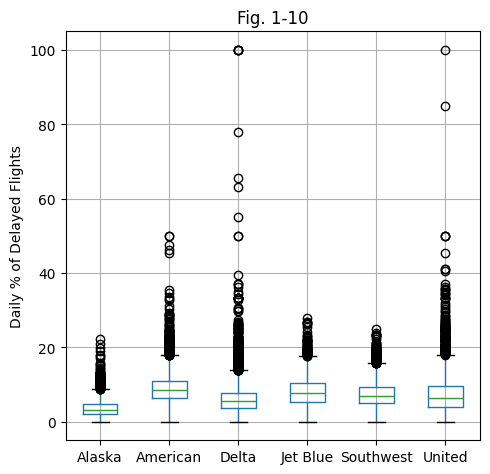

In [38]:
airline_stats = pd.read_csv('airline_stats.csv')
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')
ax.set_title('Fig. 1-10')
plt.tight_layout()
plt.show()

Alaska se destaca por tener la menor cantidad de retrasos, mientras que American tiene la mayor cantidad de retrasos: el cuartil inferior para American es m√°s alto que el cuartil superior para Alaska.
a.


#### Violin Plot

Un diagrama de viol√≠n (violin plot) es una mejora del diagrama de caja tradicional (boxplot) y fue introducido por Hintze y Nelson en 1998. A continuaci√≥n se detalla su funcionamiento y ventajas:

1. **Estimaci√≥n de Densidad**:
   - El diagrama de viol√≠n incluye una estimaci√≥n de densidad de la distribuci√≥n de los datos. La densidad de probabilidad se calcula utilizando t√©cnicas como la estimaci√≥n de densidad de kernel (KDE).
   - La densidad de probabilidad proporciona una idea de qu√© tan probable es que los datos tomen ciertos valores. En el contexto del diagrama de viol√≠n, esta densidad se representa en el eje y.

2. **Forma del Diagrama**:
   - La densidad calculada se refleja y se voltea sobre el eje y, creando dos im√°genes especulares una frente a la otra. Esta forma resultante se rellena, creando una figura que se asemeja a un viol√≠n, de ah√≠ el nombre del diagrama.
   - El eje x representa la variable categ√≥rica (por ejemplo, diferentes grupos o categor√≠as), mientras que el eje y muestra la densidad de la variable num√©rica.

3. **Ventajas del Diagrama de Viol√≠n**:
   - **Visualizaci√≥n de la Densidad**: A diferencia del diagrama de caja, que muestra solo los estad√≠sticos descriptivos b√°sicos (mediana, cuartiles y valores at√≠picos), el diagrama de viol√≠n permite visualizar la distribuci√≥n completa de los datos. Esto incluye todos los picos y valles en la densidad de los datos.
   - **Detalles Matices**: El diagrama de viol√≠n puede mostrar detalles en la distribuci√≥n de los datos que no son perceptibles en un diagrama de caja. Por ejemplo, si los datos tienen m√∫ltiples modos (picos) o si la distribuci√≥n es asim√©trica, estas caracter√≠sticas ser√°n visibles en un diagrama de viol√≠n pero no en un diagrama de caja.
   - **Comparaci√≥n de Distribuciones**: Al igual que el diagrama de caja, el diagrama de viol√≠n es √∫til para comparar la distribuci√≥n de una variable num√©rica entre diferentes grupos categ√≥ricos. Sin embargo, proporciona una visi√≥n m√°s rica y detallada de c√≥mo var√≠an las distribuciones entre los grupos.


Supongamos que queremos comparar la distribuci√≥n de los retrasos en vuelos entre diferentes aerol√≠neas. Un diagrama de viol√≠n no solo mostrar√° los cuartiles y la mediana de los retrasos, sino que tambi√©n permitir√° visualizar si los retrasos tienen una distribuci√≥n unimodal o multimodal, si hay asimetr√≠a y qu√© tan concentrados est√°n los retrasos en torno a ciertos valores.

El diagrama de viol√≠n es una herramienta poderosa para la visualizaci√≥n de datos, ya que combina las ventajas del diagrama de caja con la capacidad de mostrar la densidad de probabilidad de los datos, proporcionando una visi√≥n m√°s completa y detallada de la distribuci√≥n de los datos.

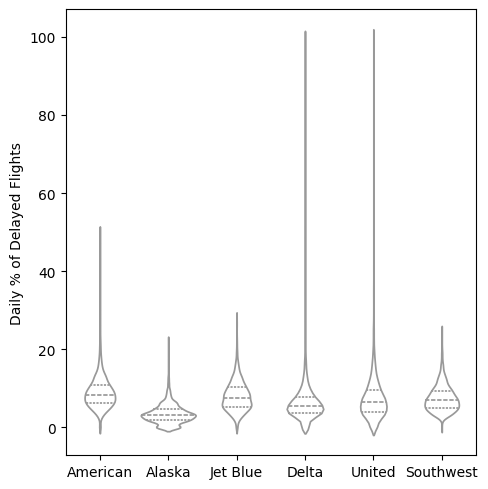

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

El gr√°fico correspondiente se muestra en la Figura 1-11. El diagrama de viol√≠n muestra una concentraci√≥n en la distribuci√≥n cerca de cero para Alaska y, en menor medida, Delta. Este fen√≥meno no es tan obvio en el diagrama de caja. 


C:\Users\juanj\AppData\Local\Temp\ipykernel_16344\3263343933.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',


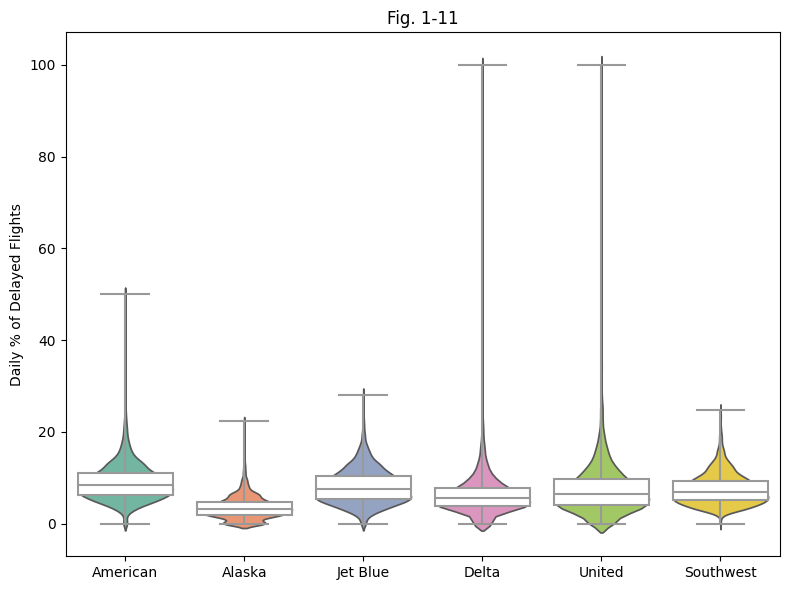

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV
airline_stats = pd.read_csv('airline_stats.csv')

# Crear el gr√°fico de viol√≠n con el diagrama de caja superpuesto
fig, ax = plt.subplots(figsize=(8, 6))

# Diagrama de viol√≠n
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', 
               inner=None, palette='Set2', ax=ax)

# Diagrama de caja superpuesto
sns.boxplot(data=airline_stats, x='airline', y='pct_carrier_delay', 
            whis=np.inf, color='white', linewidth=1.5, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
ax.set_title('Fig. 1-11')

plt.tight_layout()
plt.show()


C:\Users\juanj\AppData\Local\Temp\ipykernel_16344\1934946127.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',


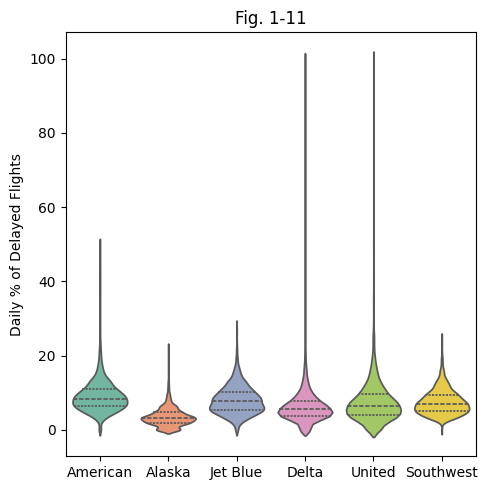

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


airline_stats = pd.read_csv('airline_stats.csv')

# violin plot con diferentes colores
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', palette='Set2')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
ax.set_title('Fig. 1-11')

plt.tight_layout()
plt.show()

El gr√°fico de viol√≠n muestra la distribuci√≥n de los porcentajes de retrasos causados por la aerol√≠nea para cada una de las compa√±√≠as a√©reas presentes en el conjunto de datos. Aqu√≠ hay algunos puntos clave de interpretaci√≥n:

- **Forma y Ancho del Viol√≠n**: La forma y el ancho del gr√°fico de viol√≠n en diferentes partes indican la densidad de los datos en esas √°reas. Las secciones m√°s anchas del viol√≠n indican una mayor densidad de valores en ese rango espec√≠fico de porcentajes de retrasos.

- **Mediana y Cuartiles**: La l√≠nca en el centro del viol√≠n representa la mediana del porcentaje de retrasos por la aerol√≠nea, mientras que otras las l√≠neas negras delgadas muestran el rango intercuart√≠lico (IQR), es decir, el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3).

- **Comparaci√≥n entre Aerol√≠neas**: Comparando los gr√°ficos de viol√≠n de las diferentes aerol√≠neas, se pueden observar diferencias en la distribuci√≥n de los retrasos. Algunas aerol√≠neas pueden tener una mayor variabilidad en los retrasos, mientras que otras muestran distribuciones m√°s concentradas.


En general, un diagrama de viol√≠n combina aspectos de un diagrama de caja y un gr√°fico de densidad para proporcionar una visualizaci√≥n detallada de la distribuci√≥n de datos. Aqu√≠ se explica c√≥mo interpretar un diagrama de viol√≠n:

### Elementos de un Diagrama de Viol√≠n

**Forma del Viol√≠n**:
- La forma del diagrama de viol√≠n representa la densidad de los datos a diferentes valores de la variable. Las √°reas m√°s anchas indican donde hay m√°s datos concentrados, mientras que las √°reas m√°s estrechas indican donde hay menos datos.

**Parte Central (Diagrama de Caja)**:
- Dentro del diagrama de viol√≠n, generalmente se incluye un diagrama de caja que muestra la mediana (l√≠nea central), el rango intercuart√≠lico (IQR, la caja) y, a veces, los valores at√≠picos (puntos fuera de los "bigotes").
  - **Mediana**: La l√≠nea blanca o negra en el centro del viol√≠n indica el valor mediano.
  - **Cuartiles**: Las l√≠neas dentro del viol√≠n muestran el primer y tercer cuartil, delimitando el rango intercuart√≠lico (IQR).

**Densidad Espejada**:
- La densidad de los datos se refleja a ambos lados del eje y se voltea horizontalmente. Esto proporciona una imagen sim√©trica que facilita la comparaci√≥n visual.

**Color**:
- Los colores pueden diferenciar categor√≠as o grupos, lo que facilita la comparaci√≥n entre diferentes grupos en el mismo gr√°fico.

### Interpretaci√≥n

**Distribuci√≥n de Datos**:
- El ancho del viol√≠n en diferentes puntos a lo largo del eje y muestra d√≥nde est√°n m√°s concentrados los datos. Una secci√≥n m√°s ancha indica una mayor densidad de datos en ese rango.

**Mediana y Cuartiles**:
- La mediana proporciona el valor central de los datos, mientras que los cuartiles y el rango intercuart√≠lico (IQR) muestran la dispersi√≥n de la mitad central de los datos.

**Valores At√≠picos**:
- Si el diagrama de caja interno incluye puntos fuera de los bigotes, estos representan valores at√≠picos, es decir, valores que est√°n significativamente alejados del resto de los datos.

**Comparaci√≥n entre Grupos**:
- Cuando se tienen m√∫ltiples violines en el mismo gr√°fico (para diferentes categor√≠as o grupos), se puede comparar la forma y la dispersi√≥n de las distribuciones entre los grupos. Diferencias en la anchura, la forma del viol√≠n y la posici√≥n de la mediana pueden indicar diferencias significativas en la distribuci√≥n dePara el caso de nuestro ejemplorol√≠nea puede mostrar lo siguiente:

- **Alaska Airlines**: Tiene un viol√≠n estrecho con la mayor√≠a de los datos concentrados cerca de la mediana, indicando poca variabilidad y pocos retrasos.
- **American Airlines**: Tiene un viol√≠n m√°s ancho con un rango intercuart√≠lico mayor y m√°s valores at√≠picos, indicando una mayor variabilidad en los retrasos y una mayor frecuencia de retrasos.


### Visualizando M√∫ltiples Variables

Los tipos de gr√°ficos utilizados para comparar dos variables‚Äîdiagramas de dispersi√≥n, binning hexagonal y diagramas de caja‚Äîse pueden extender f√°cilmente a m√°s variables mediante la noci√≥n de condicionamiento. 

Como ejemplo, volvamos a la `Figura 1-8`, que mostraba la relaci√≥n entre los pies cuadrados terminados de las casas y sus valores tasados para impuestos. Observamos que parece haber un grupo de casas que tienen un mayor valor tasado por pie cuadrado.

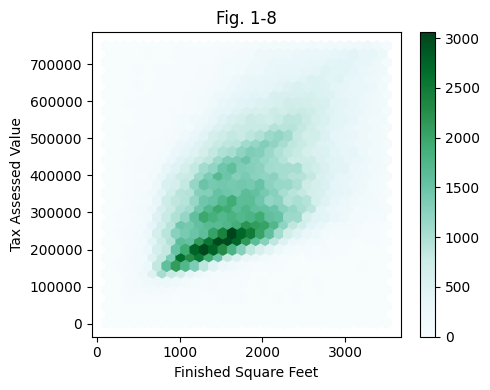

In [45]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
ax.set_title('Fig. 1-8')
plt.tight_layout()
plt.show()

Analizando m√°s a fondo, la Figura 1-12 tiene en cuenta el efecto de la ubicaci√≥n al graficar los datos para un conjunto de c√≥digos postales. Ahora la imagen es mucho m√°s clara: el valor tasado para impuestos es mucho m√°s alto en algunos c√≥digos postales (98105, 98126) que en otros (98108, 98188). Esta disparidad da lugar a los grupos observados en la `Figura 1-8`.

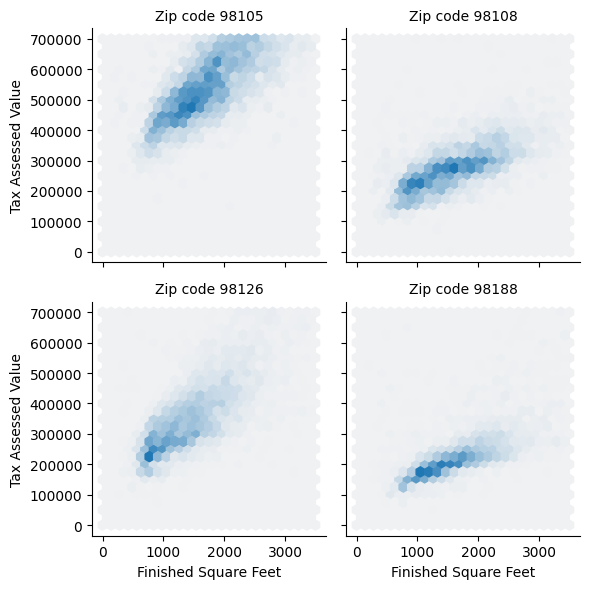

In [46]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()